In [1]:
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.decomposition import PCA

# Table of content (TOC) <a name="toc">

1. [Load data](#load-data)
2. [Correlation](#correlation)
3. [First analysis](#first-analysis)
4. [Data visualization analysis](#data_visualization_analysis)

# **Load data** <a name="load-data">

In [3]:
data = pd.read_csv("data/clean_data.csv", index_col=0)

In [4]:
data

RANDID  SEX  TOTCHOL   AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY     BMI  \
0         2448.0  1.0    195.0  39.0  106.0   70.0       0.0      0.0  26.970   
1         2448.0  1.0    209.0  52.0  121.0   66.0       0.0      0.0  27.794   
2         6238.0  0.0    250.0  46.0  121.0   81.0       0.0      0.0  28.730   
3         6238.0  0.0    260.0  52.0  105.0   70.0       0.0      0.0  29.430   
4         6238.0  0.0    237.0  58.0  108.0   66.0       0.0      0.0  28.500   
...          ...  ...      ...   ...    ...    ...       ...      ...     ...   
11622  9998212.0  1.0    173.0  46.0  126.0   82.0       0.0      0.0  19.170   
11623  9998212.0  1.0    153.0  52.0  143.0   89.0       0.0      0.0  25.740   
11624  9999312.0  0.0    196.0  39.0  133.0   86.0       1.0     30.0  20.910   
11625  9999312.0  0.0    240.0  46.0  138.0   79.0       1.0     20.0  26.390   
11626  9999312.0  0.0    189.0  50.0  147.0   96.0       1.0     10.0  24.190   

       DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
0           0.0  ...  1.0       0.0  8766.0  6438.0    6438.0   6438.0   
1           0.0  ...  1.0       0.0  8766.0  6438.0    6438.0   6438.0   
2           0.0  ...  0.0       0.0  8766.0  8766.0    8766.0   8766.0   
3           0.0  ...  0.0       0.0  8766.0  8766.0    8766.0   8766.0   
4           0.0  ...  0.0       0.0  8766.0  8766.0    8766.0   8766.0   
...         ...  ...  ...       ...     ...     ...       ...      ...   
11622       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11623       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11624       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11625       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11626       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   

       TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
0        8766.0   6438.0   8766.0   8766.0  
1        8766.0   6438.0   8766.0   8766.0  
2        8766.0   8766.0   8766.0   8766.0  
3        8766.0   8766.0   8766.0   8766.0  
4        8766.0   8766.0   8766.0   8766.0  
...         ...      ...      ...      ...  
11622    8766.0   8766.0   8766.0      0.0  
11623    8766.0   8766.0   8766.0      0.0  
11624    8766.0   8766.0   8766.0   4201.0  
11625    8766.0   8766.0   8766.0   4201.0  
11626    8766.0   8766.0   8766.0   4201.0  

[11627 rows x 39 columns]

# **Correlation** <a name="correlation">

https://d-scholarship.pitt.edu/8056/1/Chokns_etd2010.pdf

In [5]:
data_without_time = data.iloc[:,1:31]

In [6]:
def get_positive_correlations(df, inf, sup):
    for x in range(df.shape[0]):
        for y in range(x, df.shape[1]):
            if df.iloc[x, y] < sup and df.iloc[x, y] >= inf:
                print(round(df.iloc[x, y], 2), df.columns[x], df.index[y])

In [7]:
for i in np.arange(1, 0.2, -0.1):
    print("\nFROM ", round(i, 1), " TO ", round(i - 0.1, 1),  "\n")
    get_positive_correlations(data_without_time.corr(method='kendall'), i - 0.1, i)


FROM  1.0  TO  0.9 


FROM  0.9  TO  0.8 

0.87 CURSMOKE CIGPDAY
0.85 PREVCHD PREVAP
0.88 TIME PERIOD

FROM  0.8  TO  0.7 

0.72 ANGINA ANYCHD
0.78 HOSPMI MI_FCHD

FROM  0.7  TO  0.6 

0.65 PREVCHD PREVMI
0.7 MI_FCHD ANYCHD
0.69 MI_FCHD CVD
0.67 ANYCHD CVD

FROM  0.6  TO  0.5 

0.54 SYSBP DIABP
0.59 SYSBP PREVHYP
0.54 PREVAP ANGINA
0.54 PREVHYP HYPERTEN
0.54 HOSPMI ANYCHD
0.52 HOSPMI CVD
0.55 STROKE CVD

FROM  0.5  TO  0.4 

0.46 SYSBP HYPERTEN
0.46 DIABP PREVHYP
0.49 PREVCHD ANGINA
0.46 PREVCHD ANYCHD

FROM  0.4  TO  0.3 

0.3 AGE PREVHYP
0.35 AGE PERIOD
0.37 DIABP HYPERTEN
0.32 BPMEDS PREVHYP
0.32 PREVCHD HOSPMI
0.32 PREVCHD MI_FCHD
0.36 PREVAP PREVMI
0.39 PREVAP ANYCHD
0.39 PREVMI HOSPMI
0.36 PREVMI MI_FCHD
0.3 PREVMI CVD
0.36 PREVSTRK STROKE
0.39 DEATH MI_FCHD
0.32 DEATH ANYCHD
0.4 DEATH CVD
0.35 ANGINA HOSPMI
0.35 ANGINA MI_FCHD
0.33 ANGINA CVD

FROM  0.3  TO  0.2 

0.28 TOTCHOL LDLC
0.27 AGE SYSBP
0.3 AGE TIME
0.25 AGE DEATH
0.24 SYSBP BPMEDS
0.22 DIABP BMI
0.21 BMI PREVHYP
0.29

The **Kendall rank correlation coefficient** from 0.7 to 1 are not useable.

For example, the fact that someone smokes more than 0 cigarette per day means that he is a smoker (CIGPDAY and CURSMOKE with 0.87).

In other cases, the set is included into an other set (example : ANGINA is includedin ANYCHD and have 0.72 coefficient).

Some variables **depend on others**. For example if in period n someone has HYPERTEN = 1, in period n+1 he will have PREV_HYP = 1. The same apply for some variables with similar name. (kendall rank coeff. : 0.54)

**SYSBP/DIABP and HYPERTEN or PREVHYP** are very linked because if SYSBP passes 130 mmHg the patient is hypertensive. If the systolic blood pressure is between 120 and 130, then the patient is pre-hypertensive.
This correlation is observed with a kendall rank correlation coefficient of 0.59 for SYSBP and PREVHYP.

The correlation between **AGE and PREVHYP** is very interesting because we can tell that age inscreases the propability of hypertension.

**BMI is correlated with DIABP and PREVHYP** because more you are over weighted more the probability to have these diseases inscreases.

**DEATH is correlated to HOSPMI and STROKE** because with these concerns the probability of survival is very low.

In [8]:
X = data.iloc[:,1:23]
Y = data.iloc[:,23:31]
Y_time = data.iloc[:, 31:]

bp = data.loc[:, ['SYSBP', 'DIABP']]

In [9]:
for column in X.columns:
    print(column, end=' ')
    

SEX TOTCHOL AGE SYSBP DIABP CURSMOKE CIGPDAY BMI DIABETES BPMEDS HEARTRTE GLUCOSE educ PREVCHD PREVAP PREVMI PREVSTRK PREVHYP TIME PERIOD HDLC LDLC 

In [10]:
for column in Y.columns:
    print(column, end=' ')

DEATH ANGINA HOSPMI MI_FCHD ANYCHD STROKE CVD HYPERTEN 

In [11]:
for column in Y_time.columns:
    print(column, end=' ')

TIMEAP TIMEMI TIMEMIFC TIMECHD TIMESTRK TIMECVD TIMEDTH TIMEHYP 

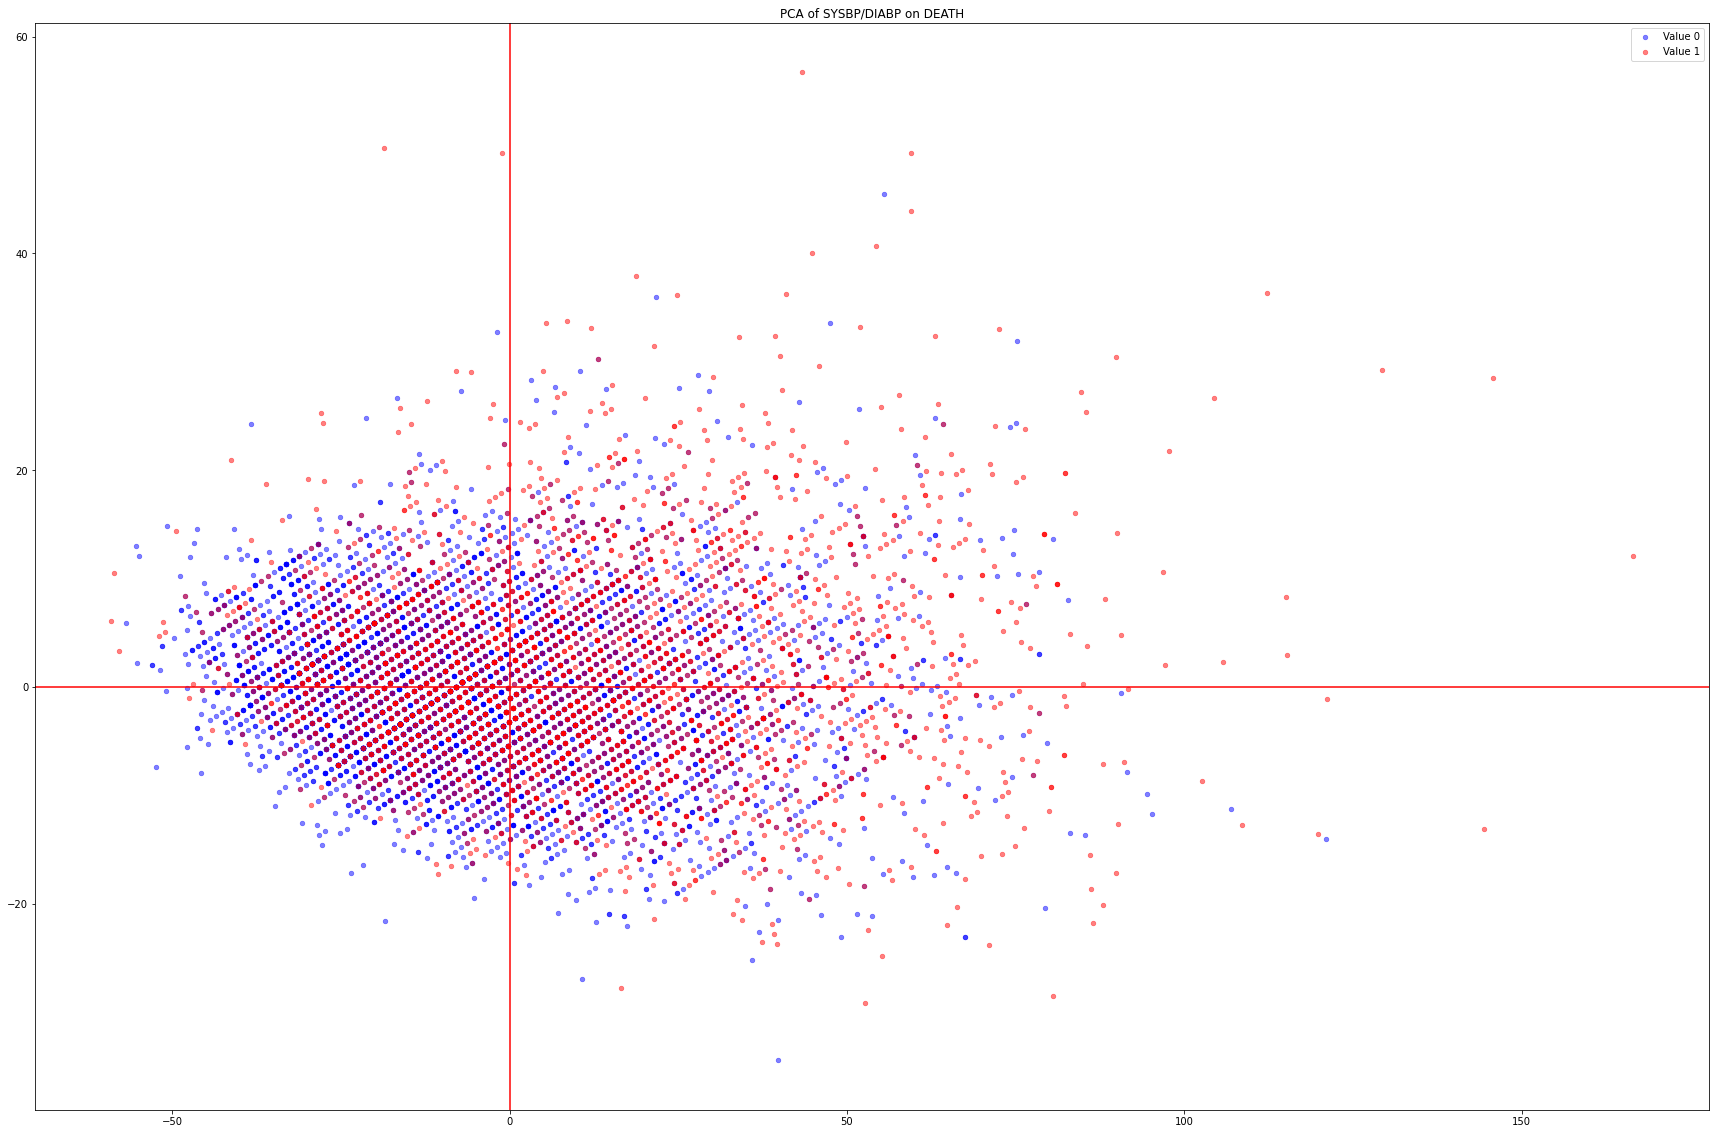

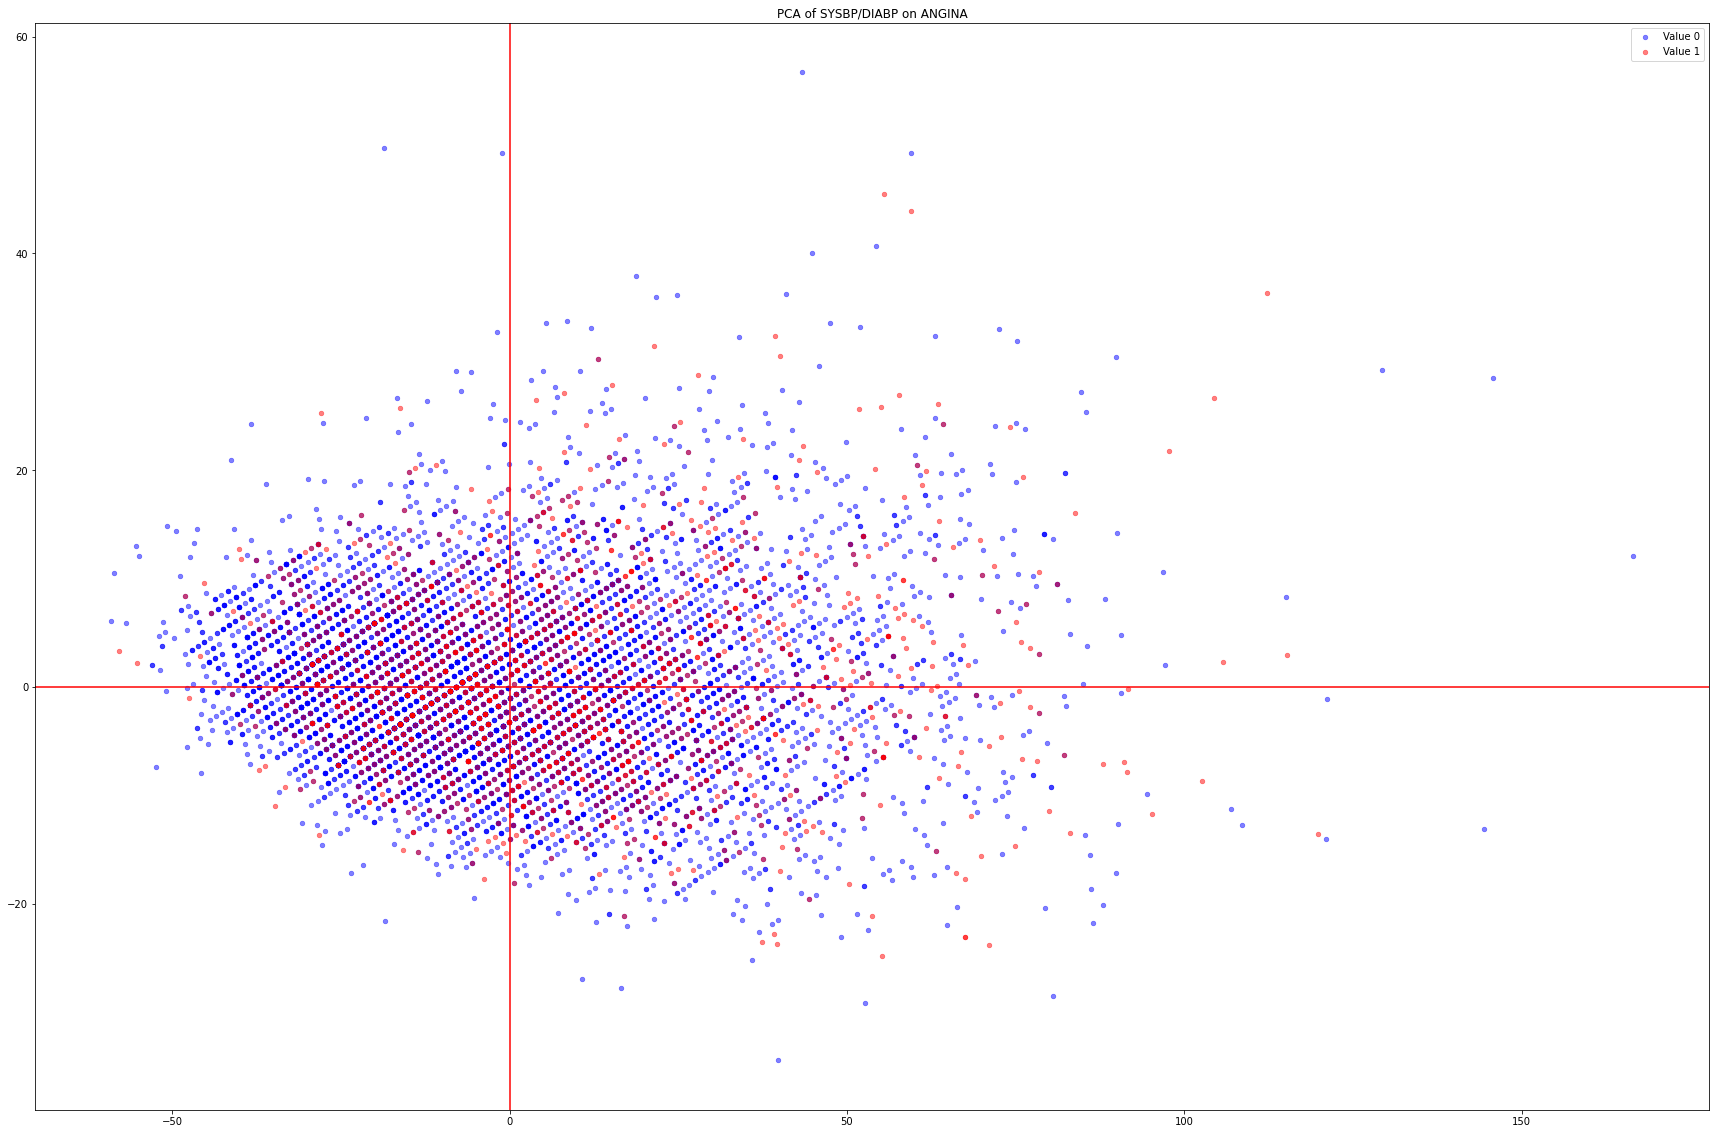

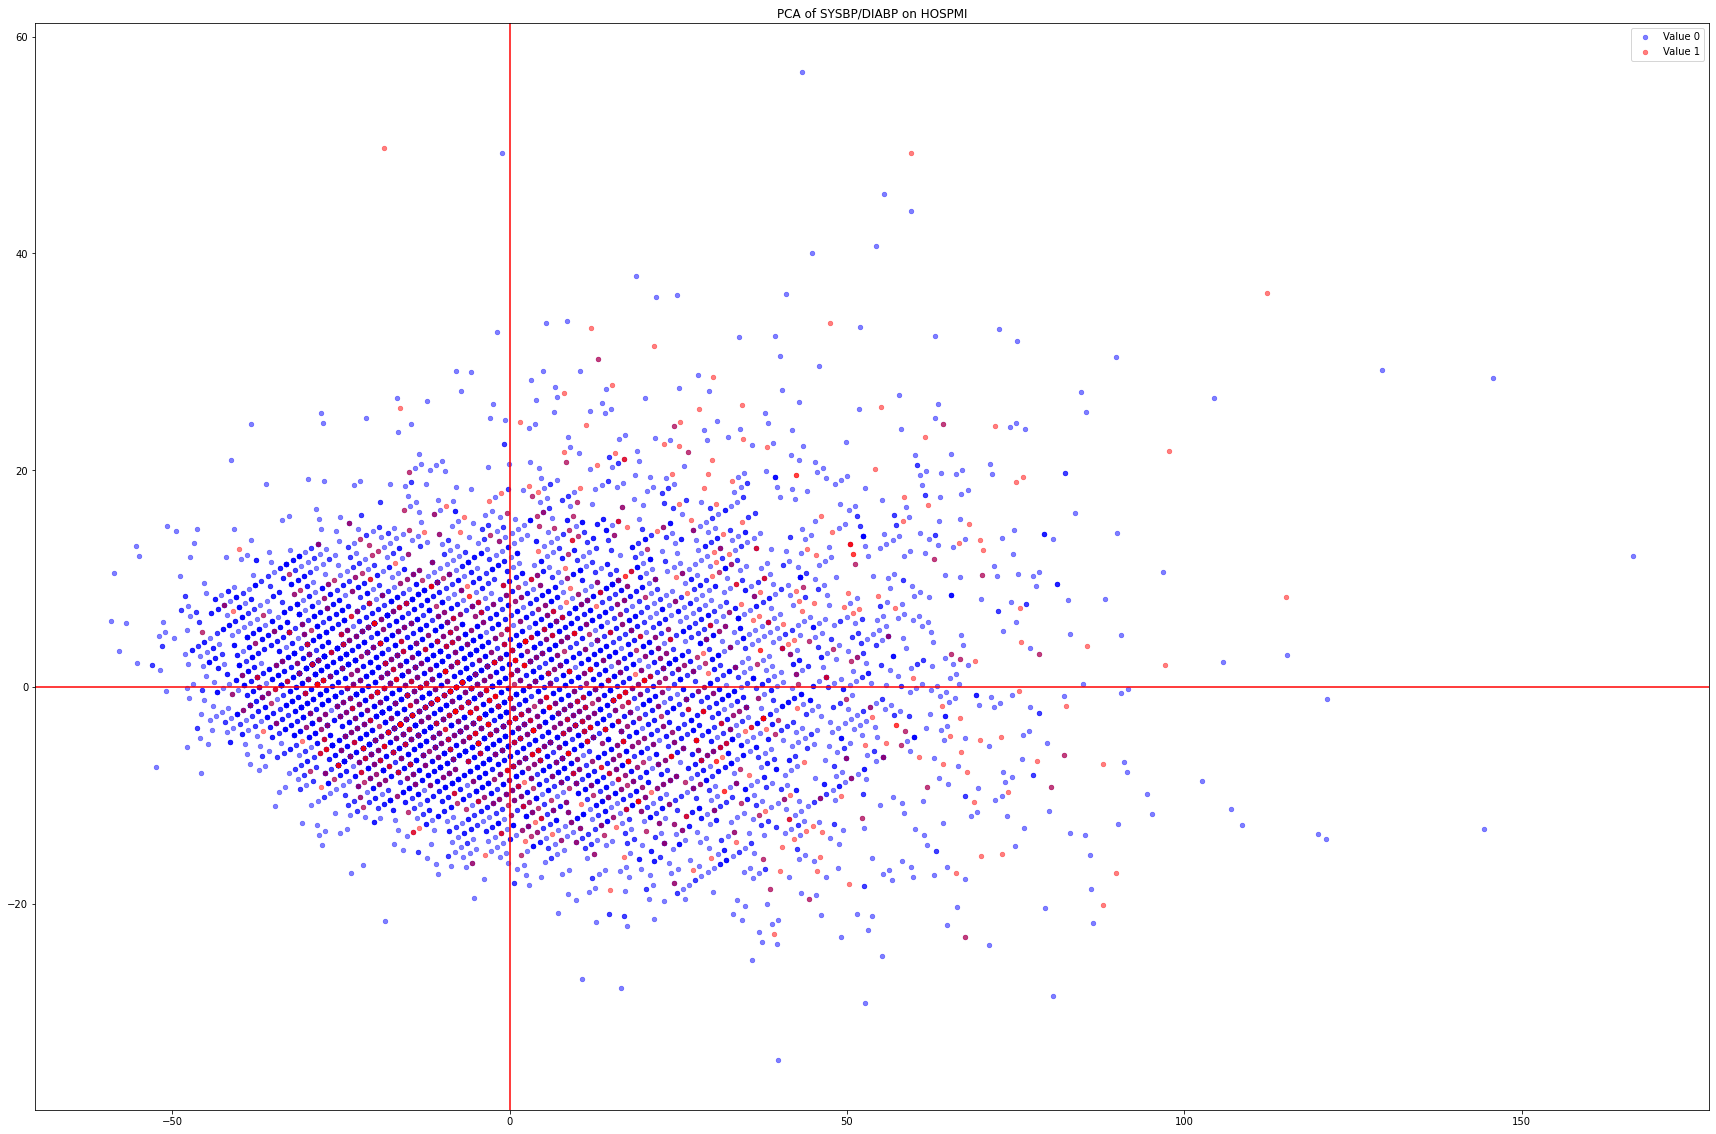

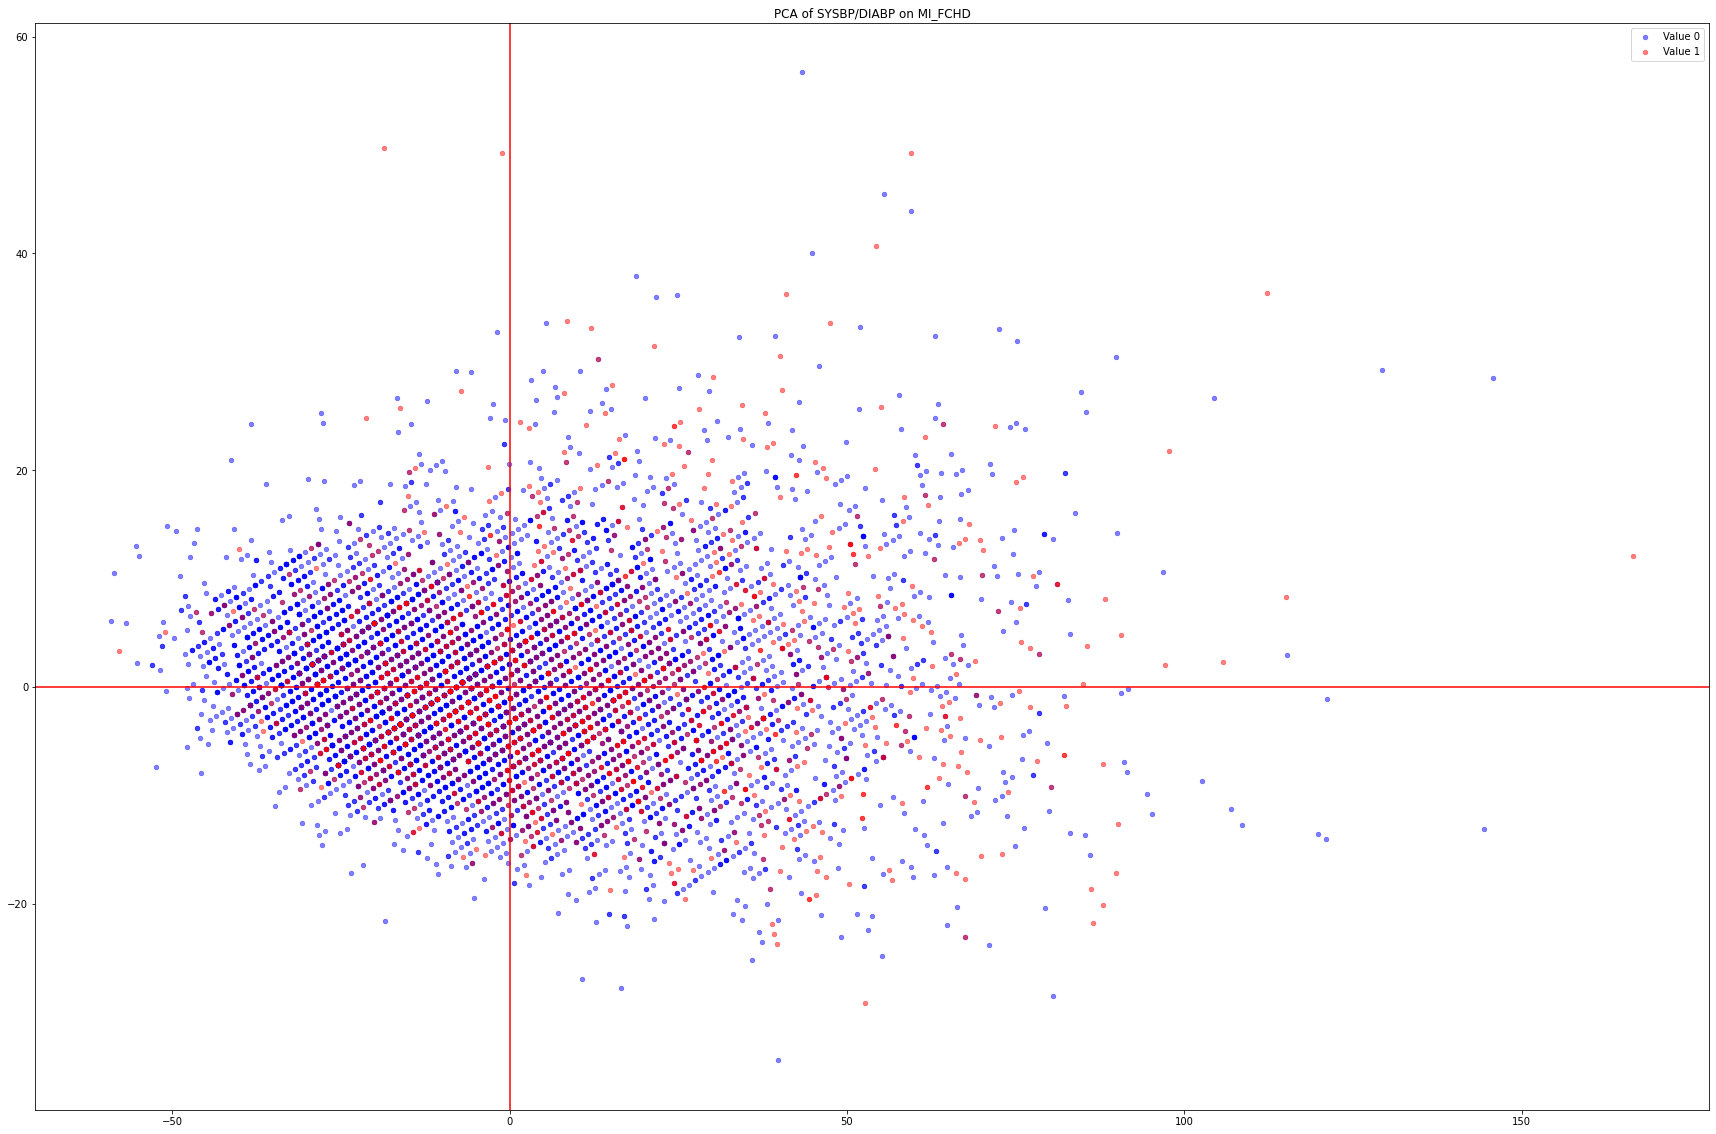

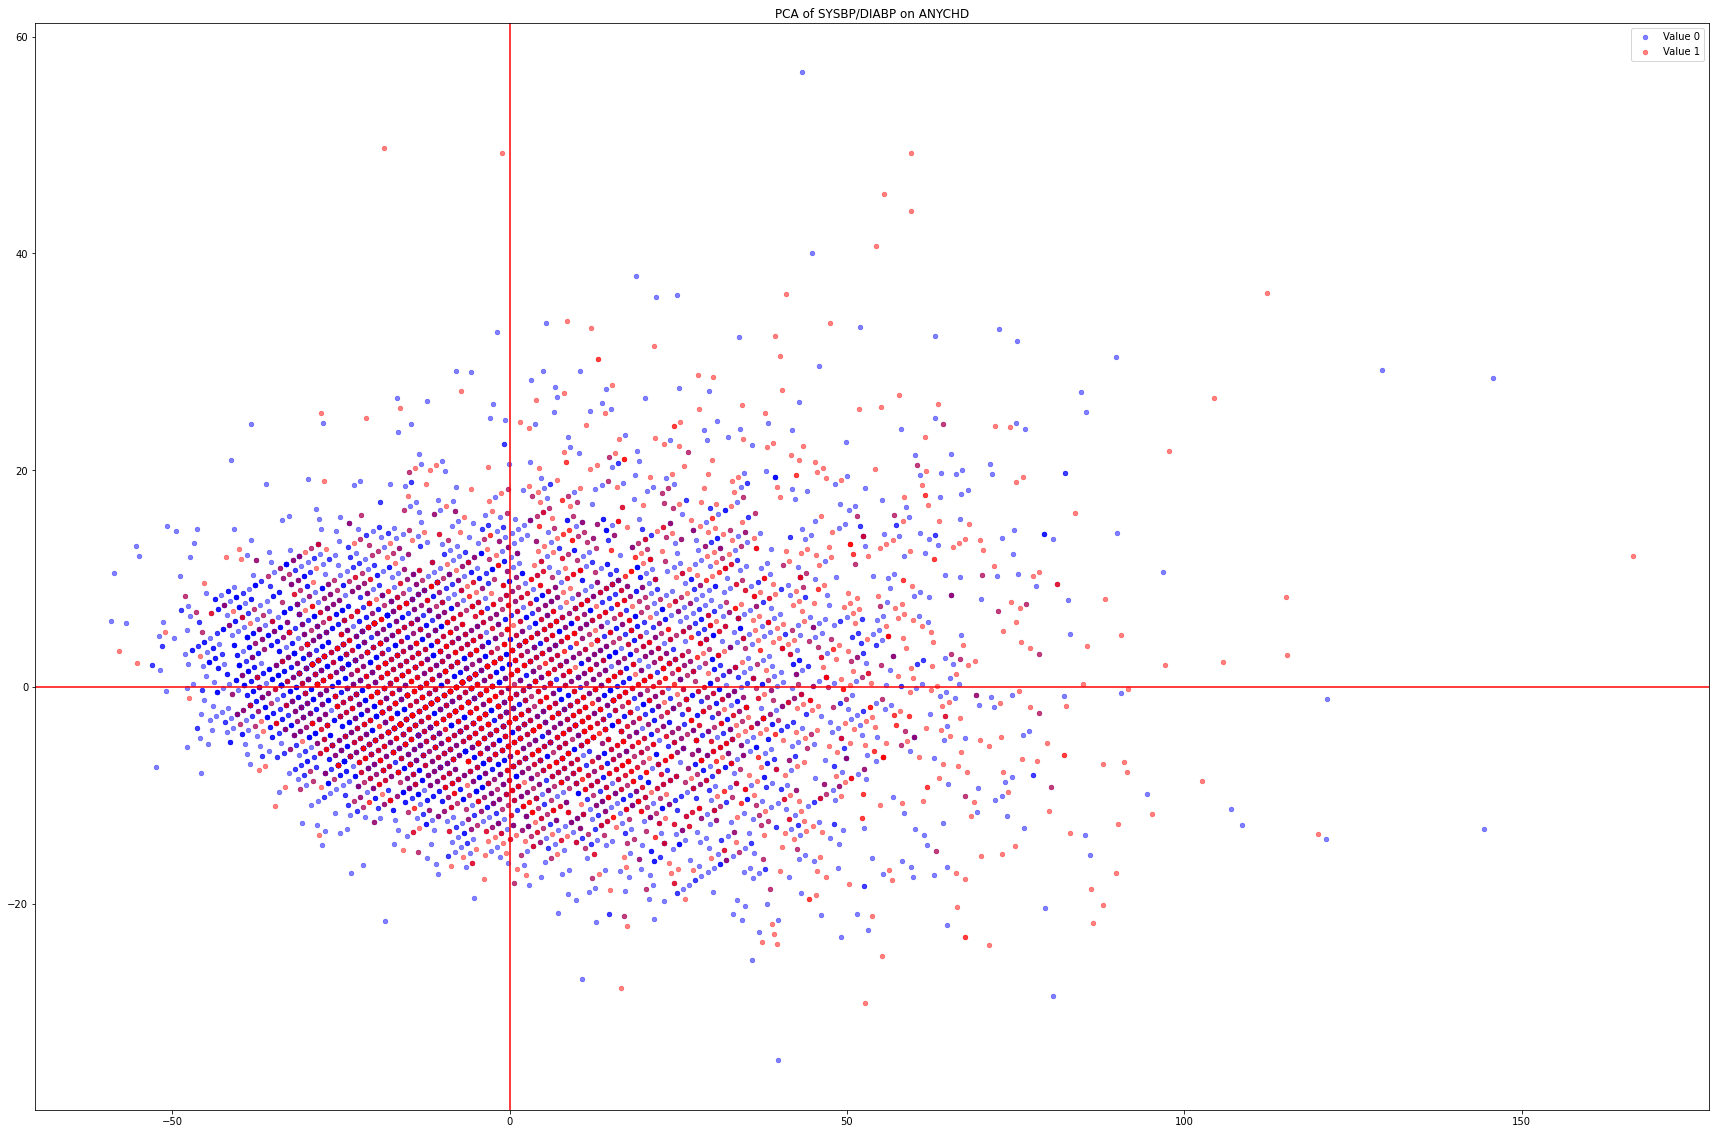

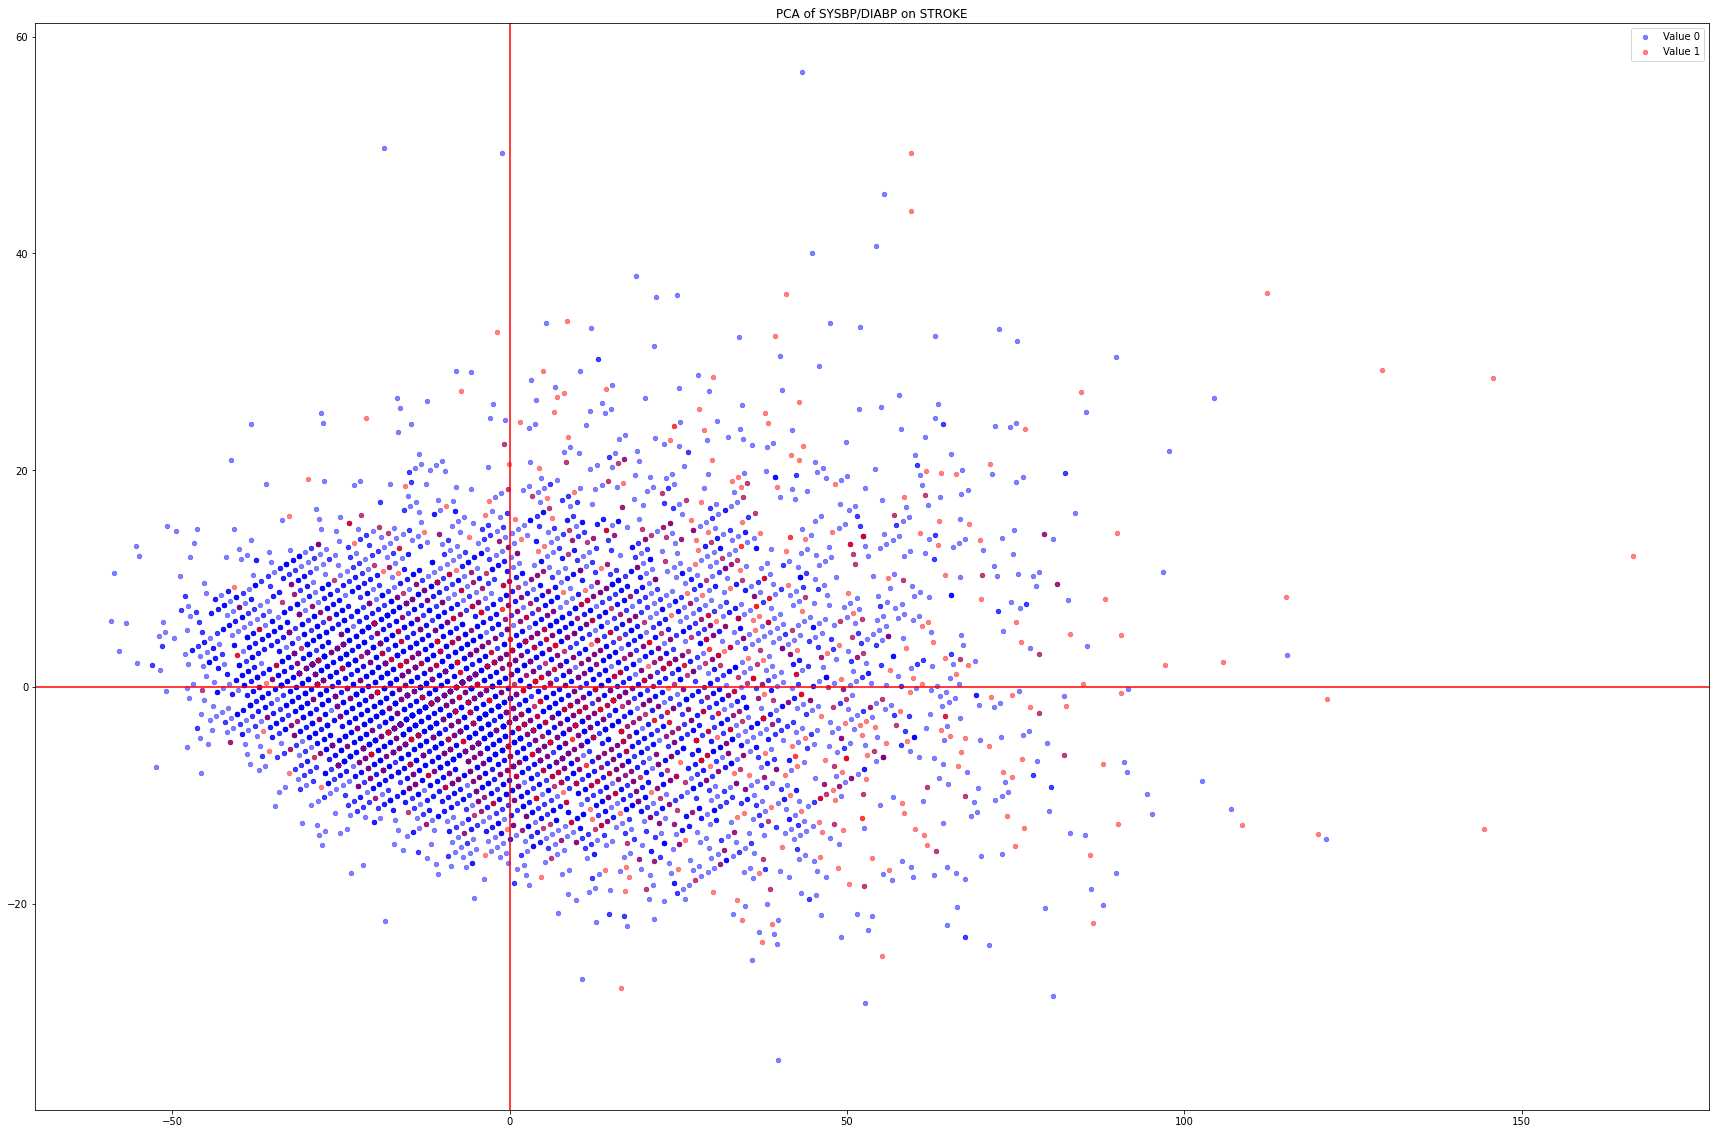

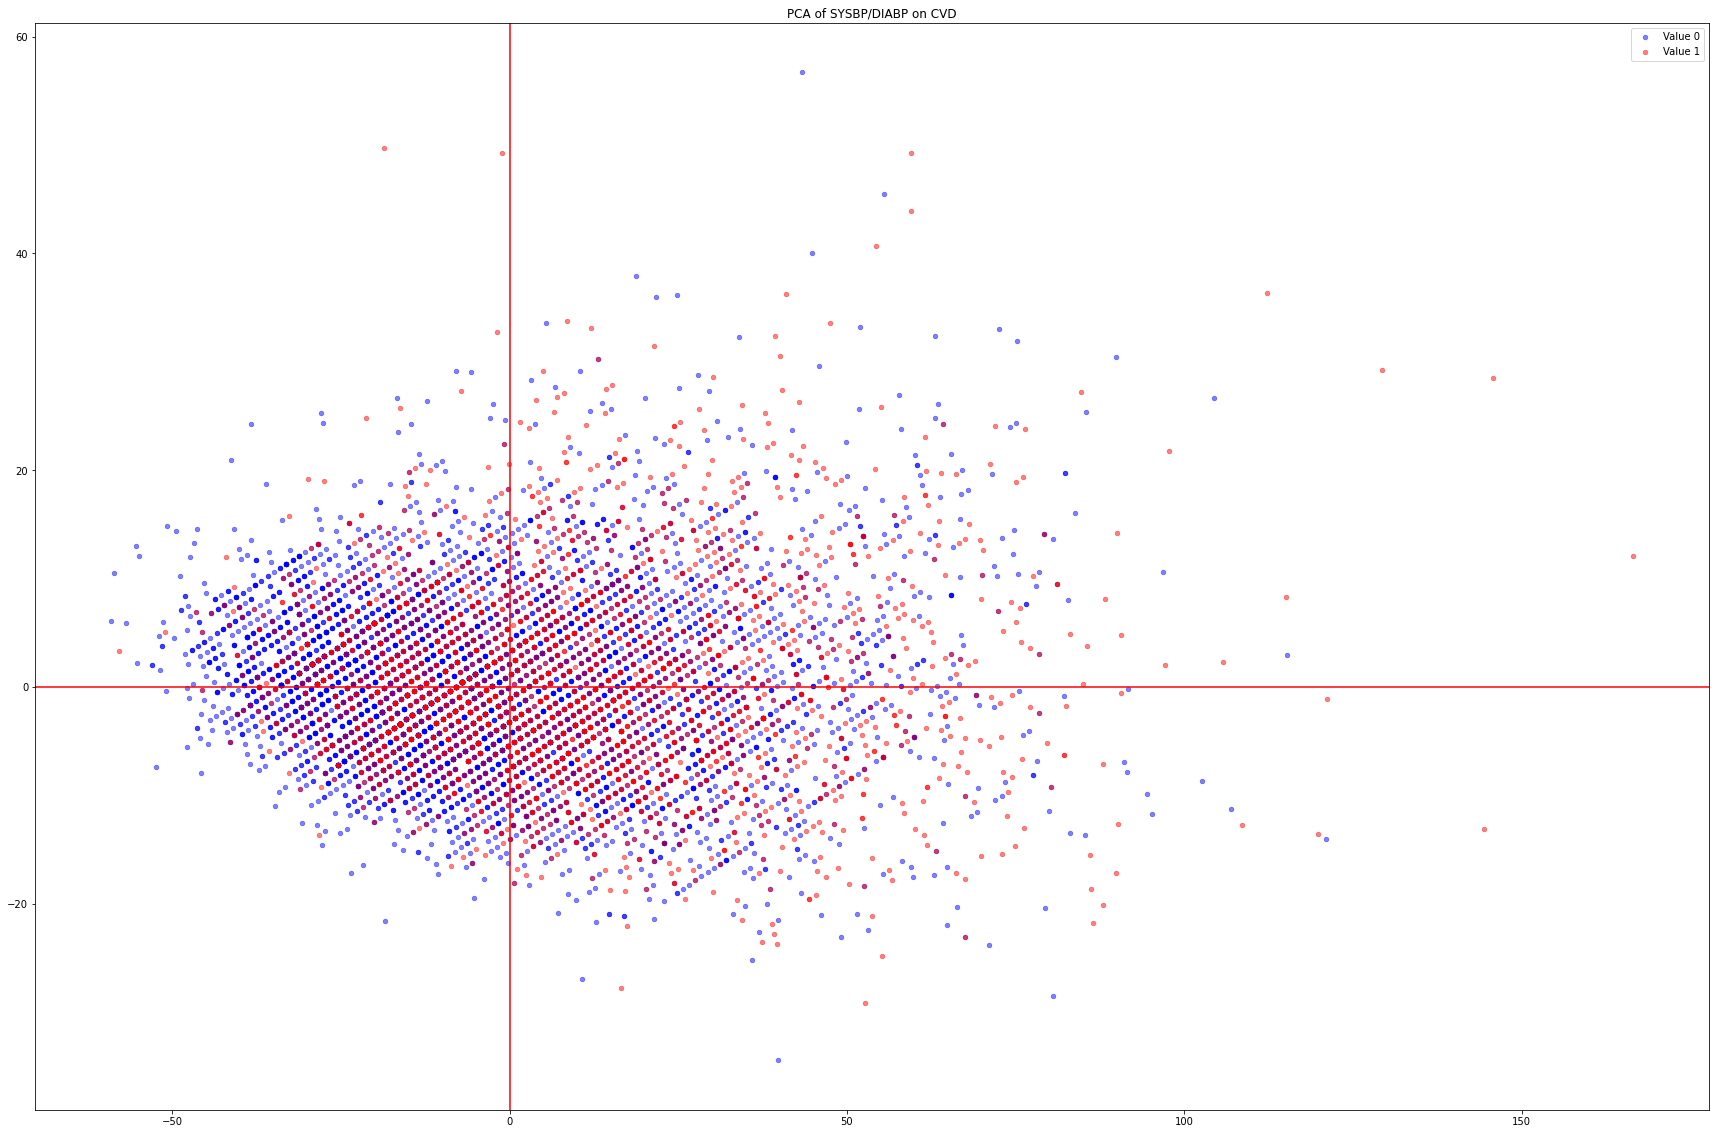

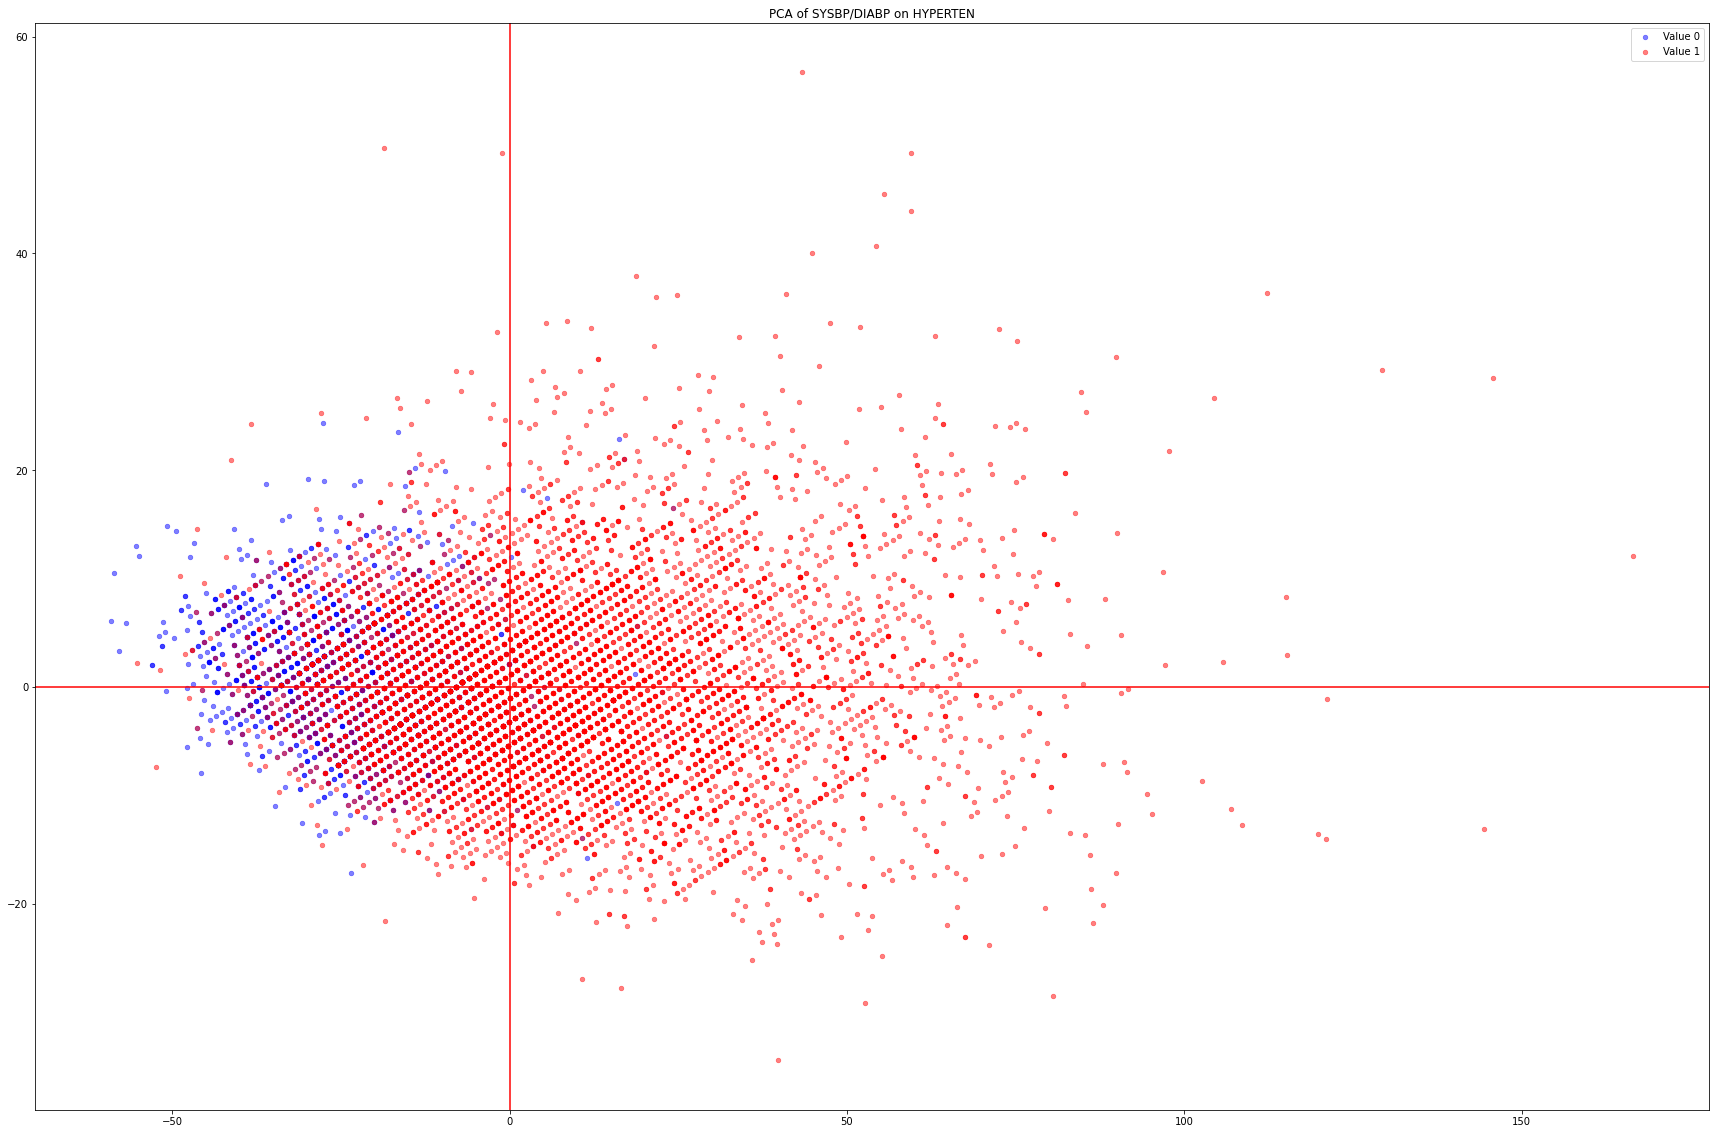

In [12]:
for column in Y.columns:
    X_pca = bp
    Y_pca = Y.loc[:, [column]]
    Y_pca = Y_pca.squeeze()

    pca = PCA(n_components=X_pca.shape[1])
    X_r = pca.fit(X_pca).transform(X_pca)



    plt.figure(figsize=(30, 20))
    colors = ['blue', 'red']
    lw = 0.6

    for color, i, target_name in zip(colors, [j for j in range(X_pca.shape[1])],['Value 0', 'Value 1']):
        plt.scatter(X_r[Y_pca == i, 0], X_r[Y_pca == i, 1], color=color, alpha=.5, lw=lw,
                    label=target_name, s=X.shape[1])

    plt.axhline(y=0, color='r', linestyle='-')
    plt.axvline(x=0, color='r', linestyle='-')

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of SYSBP/DIABP on ' + column)

#  **First analysis** <a name="first-analysis">

* Extraction by sex and period
* Generate descriptive statistics of each period and each sex
    
1. [Period 1](#first-analysis-period1)
2. [Period 2](#first-analysis-period2)
3. [Period 3](#first-analysis-period3)

[TOC](#toc)

## Period 1 analysis <a name="first-analysis-period1">
    
[First analysis](#first-analysis)

In [13]:
man_period_1 = data.loc[ (data.SEX == 1) & (data.PERIOD == 1), data.columns != 'RANDID' ]
man_period_1.describe().loc[:, man_period_1.columns != 'SEX']

TOTCHOL          AGE        SYSBP       DIABP     CURSMOKE  \
count  1944.000000  1944.000000  1944.000000  1944.00000  1944.000000   
mean    233.593621    49.786523   131.735597    83.70216     0.604424   
std      42.289088     8.719935    19.438067    11.44106     0.489100   
min     113.000000    33.000000    84.000000    48.00000     0.000000   
25%     206.000000    42.000000   118.000000    76.00000     0.000000   
50%     231.000000    49.000000   129.000000    82.00000     1.000000   
75%     259.000000    57.000000   142.000000    90.00000     1.000000   
max     696.000000    69.000000   235.000000   136.00000     1.000000   

           CIGPDAY         BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1944.000000  1944.00000  1944.000000  1944.000000  1944.000000  ...   
mean     13.186728    26.17146     0.030350     0.022119    74.399691  ...   
std      13.752522     3.40516     0.171592     0.147110    11.901129  ...   
min       0.000000    15.54000     0.000000     0.000000    44.000000  ...   
25%       0.000000    23.97000     0.000000     0.000000    66.000000  ...   
50%      10.000000    26.08000     0.000000     0.000000    75.000000  ...   
75%      20.000000    28.32250     0.000000     0.000000    80.000000  ...   
max      70.000000    40.38000     1.000000     1.000000   130.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1944.000000  1944.000000  1944.000000  1944.000000  1944.000000   
mean      0.352881     0.722222  6507.496914  6736.198045  6654.539609   
std       0.477989     0.448018  2929.238512  2770.552807  2815.784676   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  4574.000000  5007.250000  4832.500000   
50%       0.000000     1.000000  8485.500000  8766.000000  8742.500000   
75%       1.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1944.000000  1944.000000  1944.000000  1944.000000  1944.000000  
mean   6155.881687  7003.434671  6273.698045  7193.645062  3313.345679  
std    3066.851263  2509.104302  3015.175679  2385.761805  3390.769977  
min       0.000000     0.000000     0.000000    26.000000     0.000000  
25%    3864.000000  5609.250000  4010.000000  6053.500000     0.000000  
50%    7653.000000  8766.000000  7894.500000  8766.000000  2155.500000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  6471.000000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

In [14]:
woman_period_1 = data.loc[ (data.SEX == 2) & (data.PERIOD == 1), data.columns != 'RANDID' ]
woman_period_1.describe().loc[:, woman_period_1.columns != 'SEX']

TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY  BMI  DIABETES  BPMEDS  \
count      0.0  0.0    0.0    0.0       0.0      0.0  0.0       0.0     0.0   
mean       NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
std        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
min        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
25%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
50%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
75%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
max        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   

       HEARTRTE  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
count       0.0  ...  0.0       0.0     0.0     0.0       0.0      0.0   
mean        NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
std         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
min         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
25%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
50%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
75%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
max         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   

       TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
count       0.0      0.0      0.0      0.0  
mean        NaN      NaN      NaN      NaN  
std         NaN      NaN      NaN      NaN  
min         NaN      NaN      NaN      NaN  
25%         NaN      NaN      NaN      NaN  
50%         NaN      NaN      NaN      NaN  
75%         NaN      NaN      NaN      NaN  
max         NaN      NaN      NaN      NaN  

[8 rows x 37 columns]

## Period 2 analysis <a name="first-analysis-period2">
    
[First analysis](#first-analysis)

In [15]:
men_period_2 = data.loc[ (data.SEX == 1) & (data.PERIOD == 2), data.columns != 'RANDID' ]
men_period_2.describe().loc[:, men_period_2.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  1691.000000  1691.000000  1691.000000  1691.000000  1691.000000   
mean    241.881727    55.102306   135.477232    84.609107     0.520402   
std      41.940041     8.508030    19.894870    10.903955     0.499731   
min     115.000000    39.000000    88.000000    53.000000     0.000000   
25%     214.000000    48.000000   120.000000    78.000000     0.000000   
50%     240.000000    54.000000   132.000000    84.000000     1.000000   
75%     266.000000    62.000000   148.000000    91.000000     1.000000   
max     614.000000    75.000000   216.000000   124.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1691.000000  1691.000000  1691.000000  1691.000000  1691.000000  ...   
mean     12.228267    26.224140     0.043761     0.059728    75.921348  ...   
std      15.010014     3.393499     0.204624     0.237052    12.656839  ...   
min       0.000000    16.240000     0.000000     0.000000    42.000000  ...   
25%       0.000000    24.055000     0.000000     0.000000    68.000000  ...   
50%       2.000000    26.090000     0.000000     0.000000    75.000000  ...   
75%      20.000000    28.220000     0.000000     0.000000    83.000000  ...   
max      90.000000    39.460000     1.000000     1.000000   130.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1691.000000  1691.000000  1691.000000  1691.000000  1691.000000   
mean      0.331165     0.739208  6962.490242  7213.095801  7143.768185   
std       0.470771     0.439197  2578.156886  2344.900572  2399.528540   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  5531.500000  6057.500000  5875.000000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       1.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1691.000000  1691.000000  1691.000000  1691.000000  1691.000000  
mean   6608.645772  7506.645180  6746.266115  7690.318746  3507.263749  
std    2784.584174  1942.007576  2696.579778  1752.146261  3410.102980  
min       0.000000     0.000000     0.000000  2142.000000     0.000000  
25%    4800.500000  6469.000000  5068.000000  6961.000000     0.000000  
50%    8365.000000  8766.000000  8744.000000  8766.000000  2245.000000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  6835.000000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

In [16]:
woman_period_2 = data.loc[ (data.SEX == 2) & (data.PERIOD == 2), data.columns != 'RANDID' ]
woman_period_2.describe().loc[:, woman_period_2.columns != 'SEX']

TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY  BMI  DIABETES  BPMEDS  \
count      0.0  0.0    0.0    0.0       0.0      0.0  0.0       0.0     0.0   
mean       NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
std        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
min        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
25%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
50%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
75%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
max        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   

       HEARTRTE  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
count       0.0  ...  0.0       0.0     0.0     0.0       0.0      0.0   
mean        NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
std         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
min         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
25%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
50%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
75%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
max         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   

       TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
count       0.0      0.0      0.0      0.0  
mean        NaN      NaN      NaN      NaN  
std         NaN      NaN      NaN      NaN  
min         NaN      NaN      NaN      NaN  
25%         NaN      NaN      NaN      NaN  
50%         NaN      NaN      NaN      NaN  
75%         NaN      NaN      NaN      NaN  
max         NaN      NaN      NaN      NaN  

[8 rows x 37 columns]

## Period 3 analysis <a name="first-analysis-period3">
    
[First analysis](#first-analysis)

In [17]:
men_period_3 = data.loc[ (data.SEX == 1) & (data.PERIOD == 3), data.columns != 'RANDID' ]
men_period_3.describe().loc[:, men_period_3.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  1387.000000  1387.000000  1387.000000  1387.000000  1387.000000   
mean    226.470800    60.348955   139.257390    82.553713     0.388609   
std      40.477753     8.191481    21.147205    11.284103     0.487610   
min     130.000000    45.000000    91.000000    30.000000     0.000000   
25%     199.000000    53.000000   123.000000    75.000000     0.000000   
50%     223.000000    60.000000   136.000000    82.000000     0.000000   
75%     252.000000    67.000000   152.000000    90.000000     1.000000   
max     413.000000    80.000000   225.000000   123.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1387.000000  1387.000000  1387.000000  1387.000000  1387.000000  ...   
mean      8.720260    26.229452     0.086518     0.101658    75.877433  ...   
std      13.500346     3.492272     0.281228     0.302307    12.730449  ...   
min       0.000000    14.430000     0.000000     0.000000    43.000000  ...   
25%       0.000000    24.020000     0.000000     0.000000    66.000000  ...   
50%       0.000000    26.090000     0.000000     0.000000    75.000000  ...   
75%      20.000000    28.250000     0.000000     0.000000    85.000000  ...   
max      80.000000    45.430000     1.000000     1.000000   150.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1387.000000  1387.000000  1387.000000  1387.000000  1387.000000   
mean      0.319394     0.744052  7437.912040  7679.852199  7613.967556   
std       0.466410     0.436550  2211.526503  1973.004821  2037.439626   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  6671.000000  7202.000000  7013.500000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       1.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1387.000000  1387.000000  1387.000000  1387.000000  1387.000000  
mean   7094.719539  7958.942322  7220.617159  8143.580389  3757.140591  
std    2477.391742  1438.837473  2378.490315  1148.659623  3442.218920  
min       0.000000     0.000000     0.000000  4182.000000     0.000000  
25%    5965.500000  7512.500000  6187.000000  7971.500000     0.000000  
50%    8766.000000  8766.000000  8766.000000  8766.000000  2921.000000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  7409.000000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

In [18]:
woman_period_3 = data.loc[ (data.SEX == 2) & (data.PERIOD == 3), data.columns != 'RANDID' ]
woman_period_3.describe().loc[:, woman_period_3.columns != 'SEX']

TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY  BMI  DIABETES  BPMEDS  \
count      0.0  0.0    0.0    0.0       0.0      0.0  0.0       0.0     0.0   
mean       NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
std        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
min        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
25%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
50%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
75%        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   
max        NaN  NaN    NaN    NaN       NaN      NaN  NaN       NaN     NaN   

       HEARTRTE  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
count       0.0  ...  0.0       0.0     0.0     0.0       0.0      0.0   
mean        NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
std         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
min         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
25%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
50%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
75%         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   
max         NaN  ...  NaN       NaN     NaN     NaN       NaN      NaN   

       TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
count       0.0      0.0      0.0      0.0  
mean        NaN      NaN      NaN      NaN  
std         NaN      NaN      NaN      NaN  
min         NaN      NaN      NaN      NaN  
25%         NaN      NaN      NaN      NaN  
50%         NaN      NaN      NaN      NaN  
75%         NaN      NaN      NaN      NaN  
max         NaN      NaN      NaN      NaN  

[8 rows x 37 columns]

# Data visualization analysis <a name="data_visualization_analysis">
    
1. [stat_parameter](#stat_parameter)
2. [Experience analysis](#experience_analysis)
    
[TOC](#toc)

<ipython-input-19-25ad361a4b6f>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))


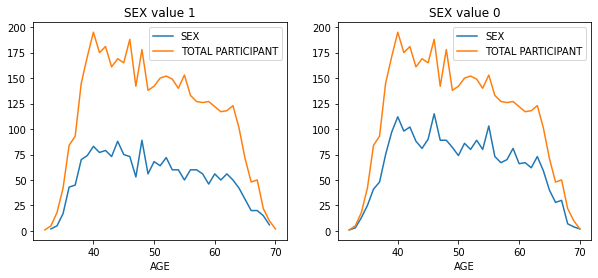

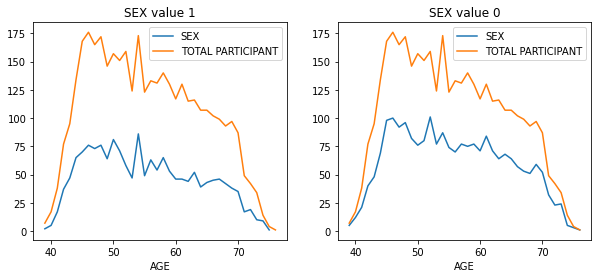

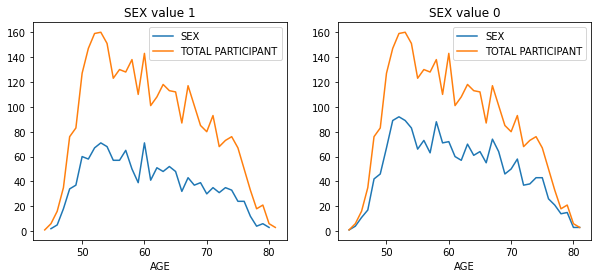

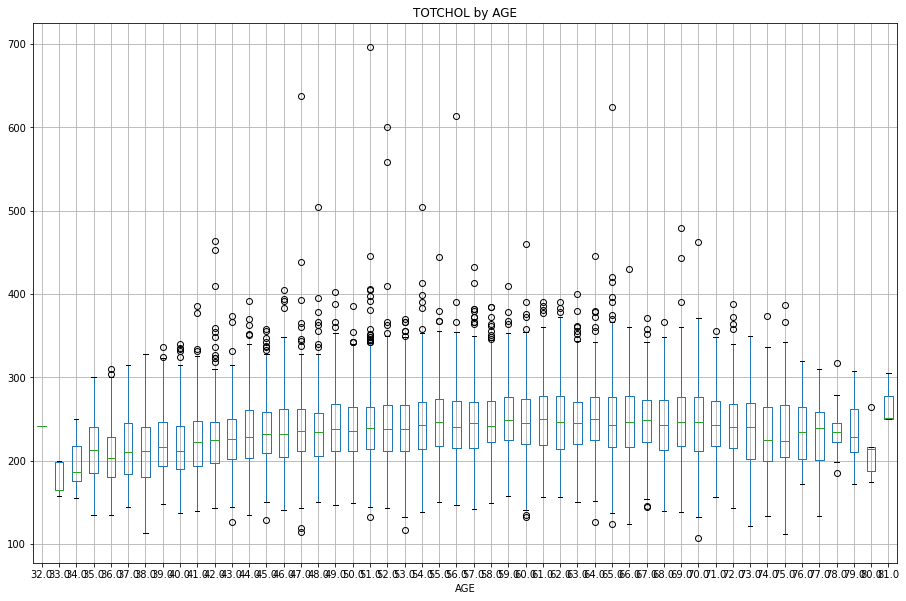

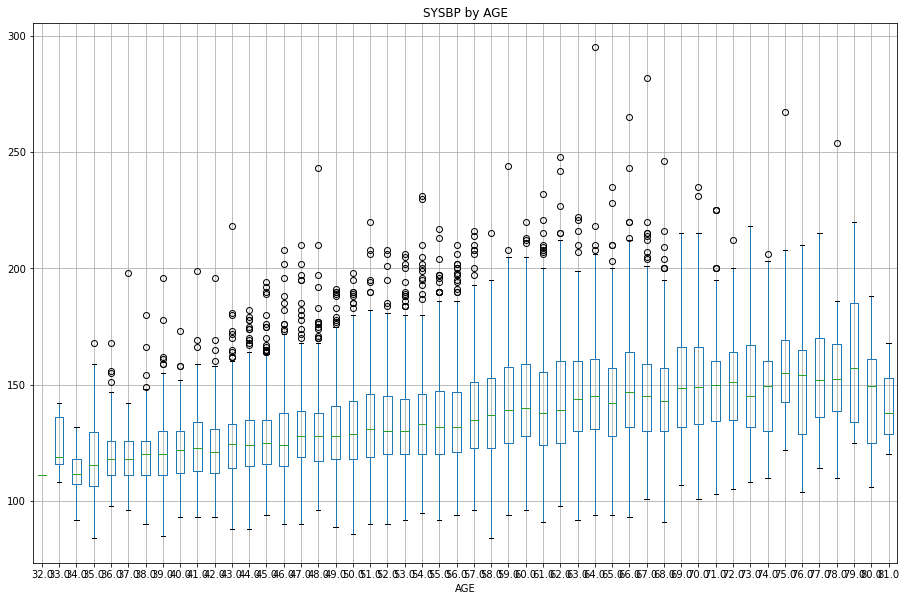

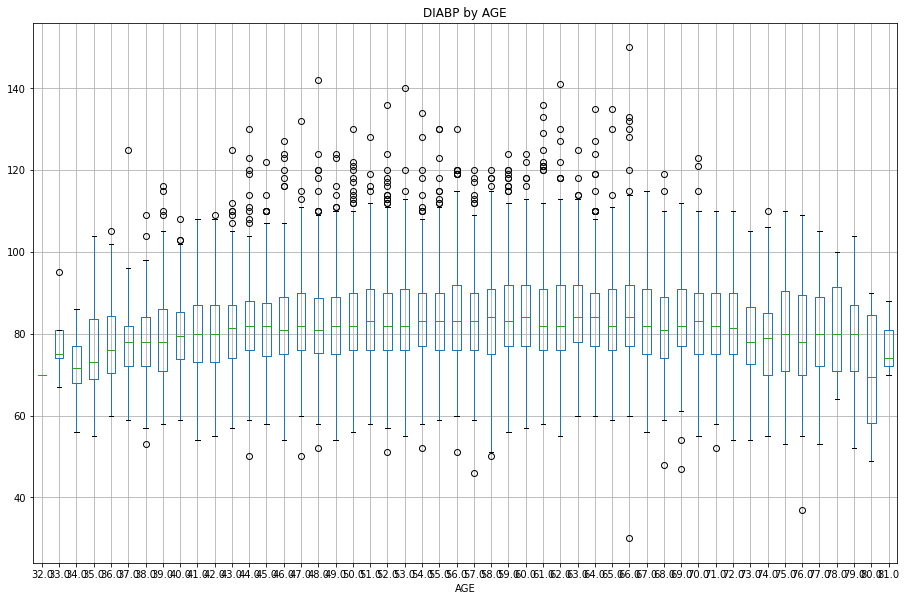

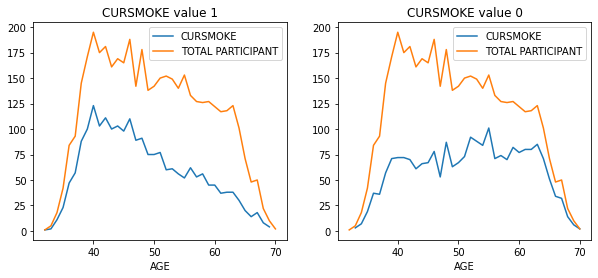

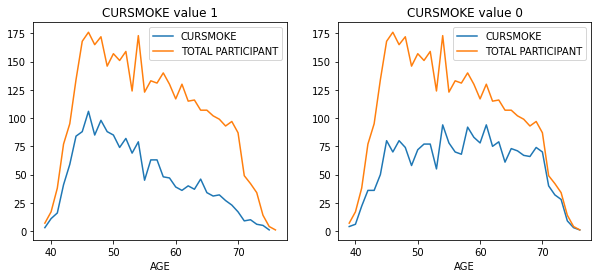

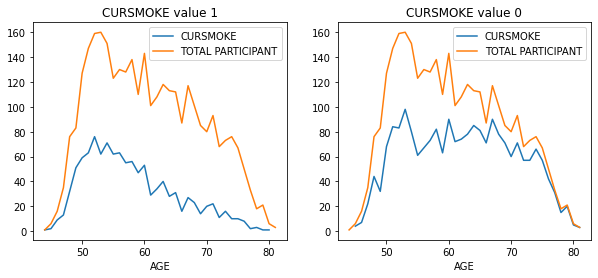

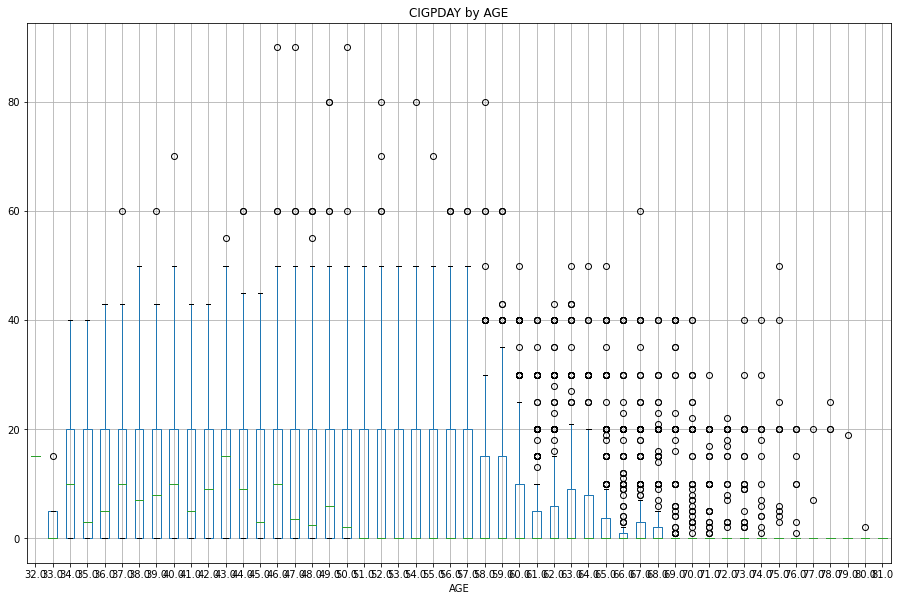

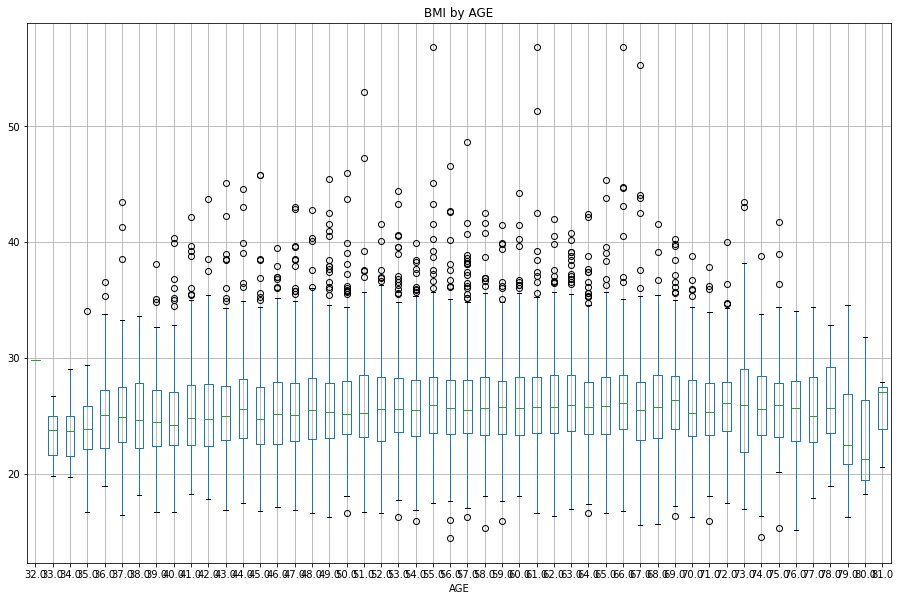

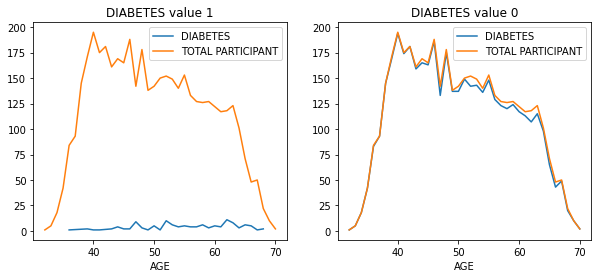

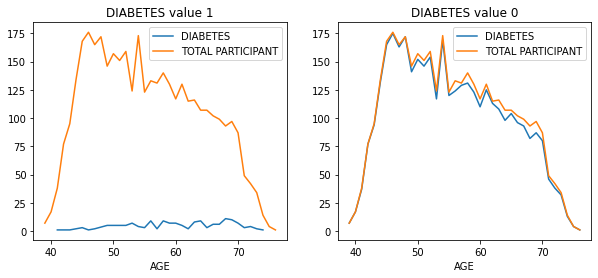

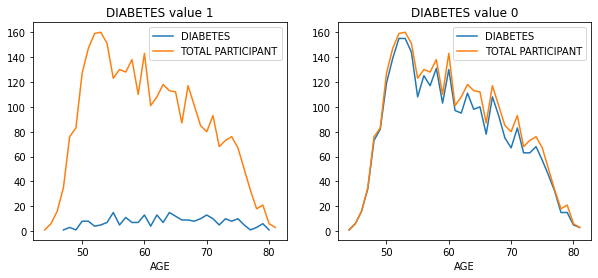

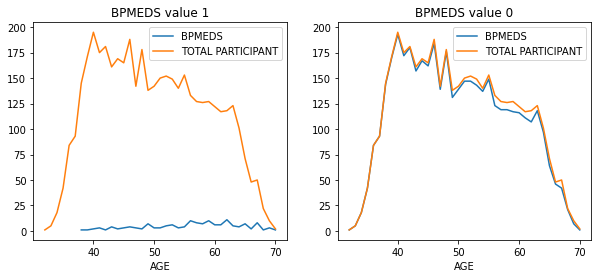

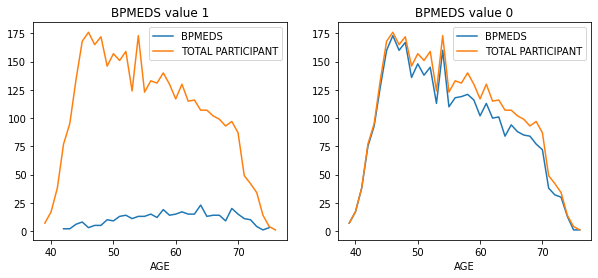

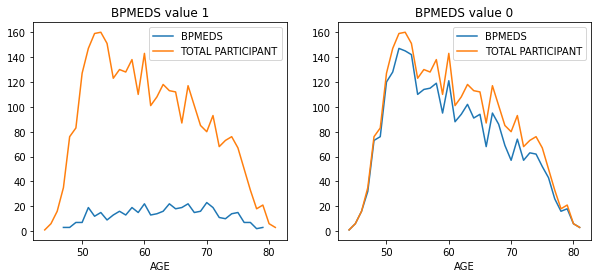

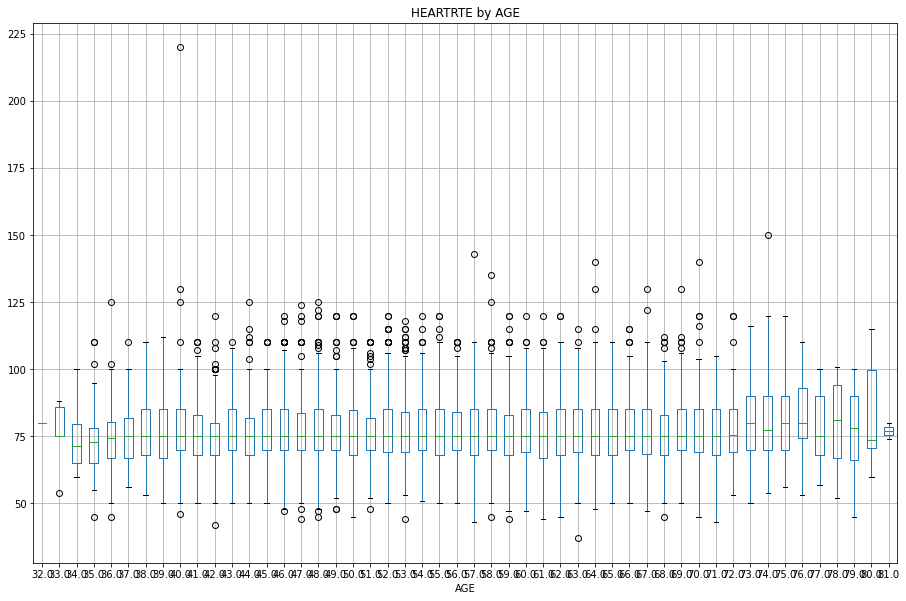

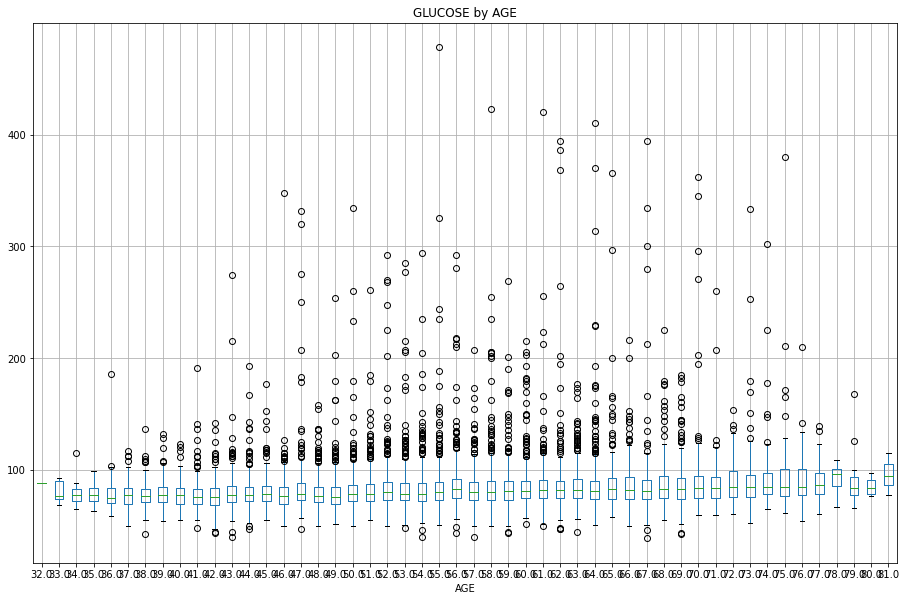

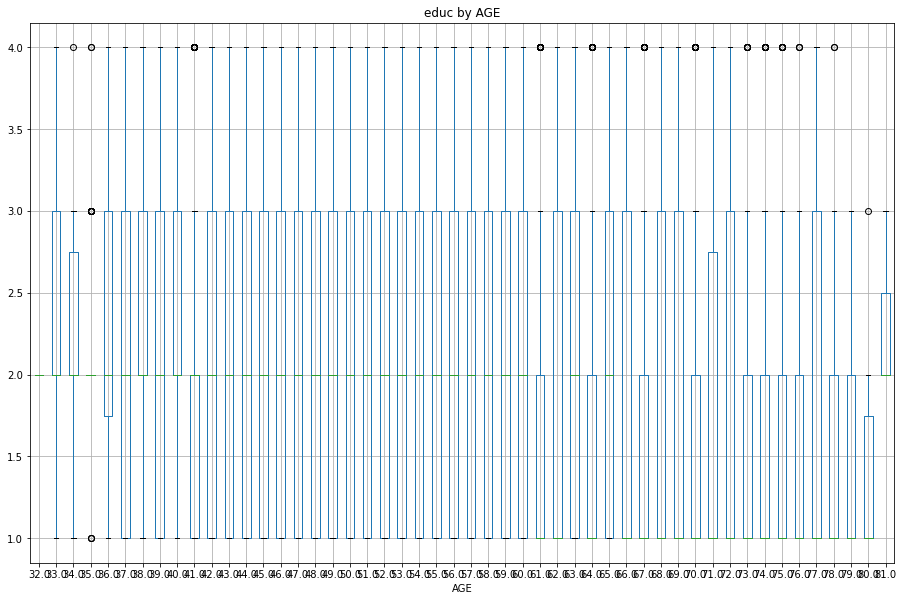

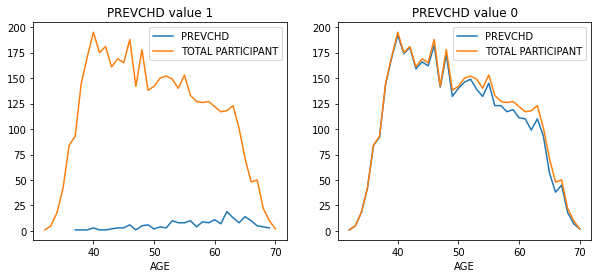

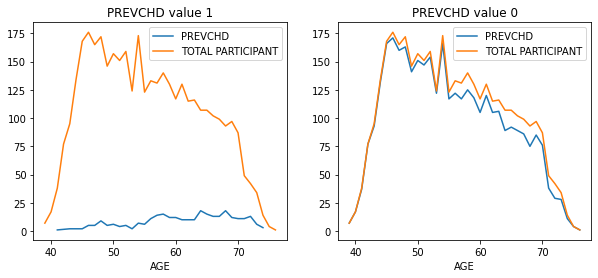

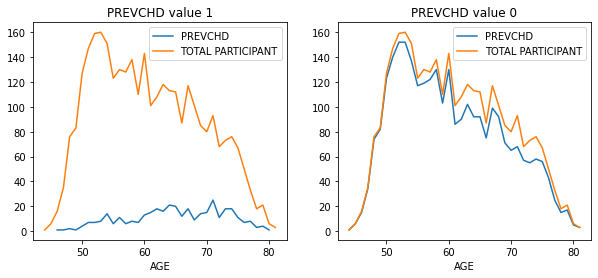

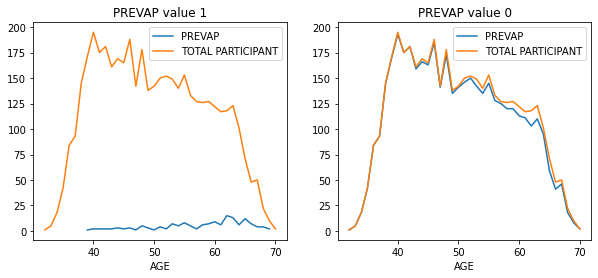

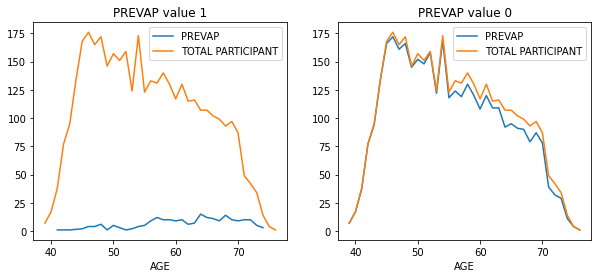

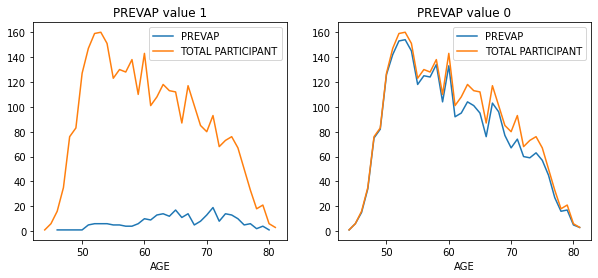

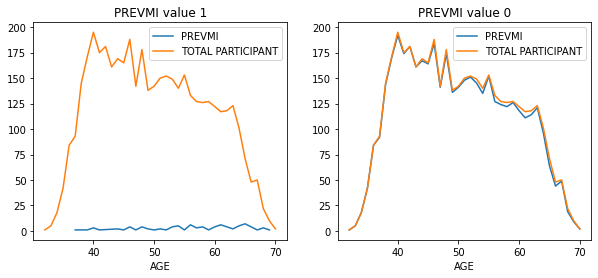

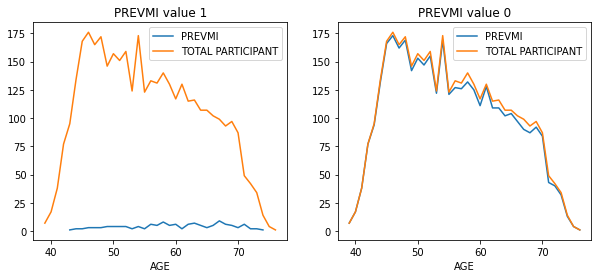

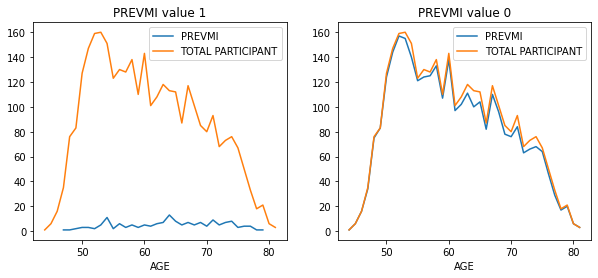

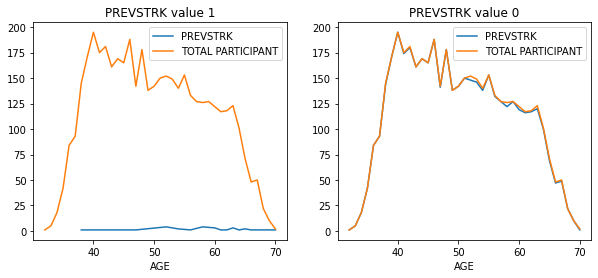

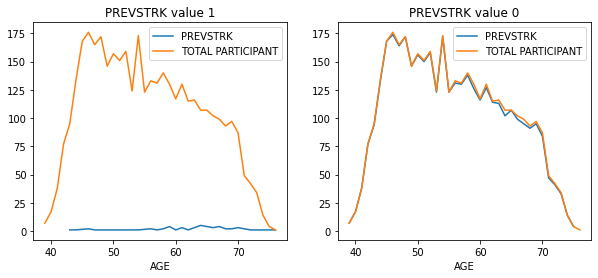

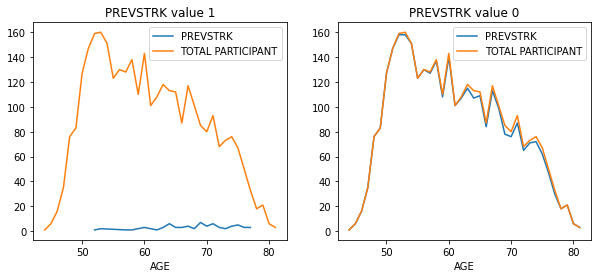

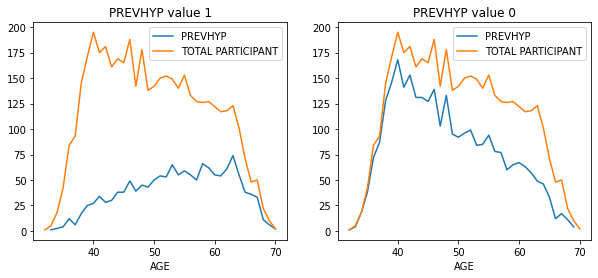

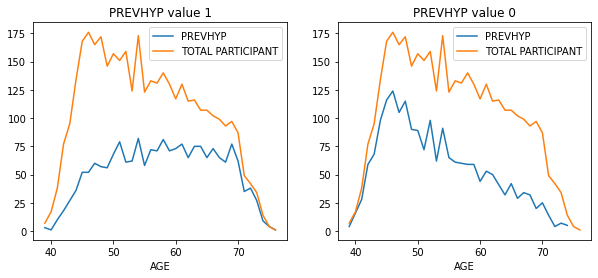

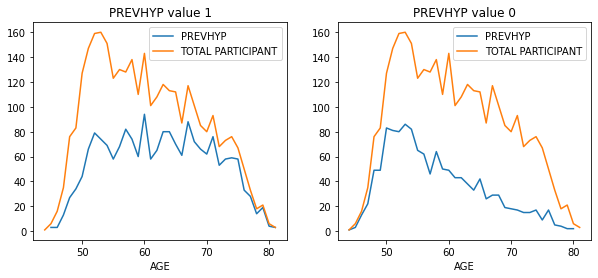

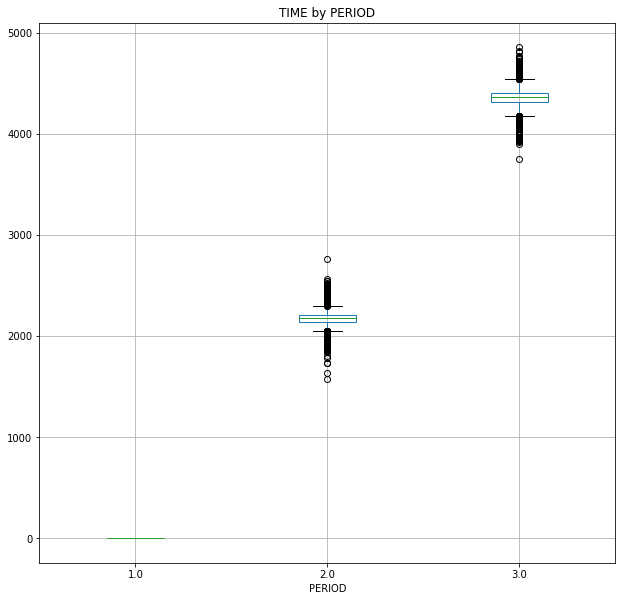

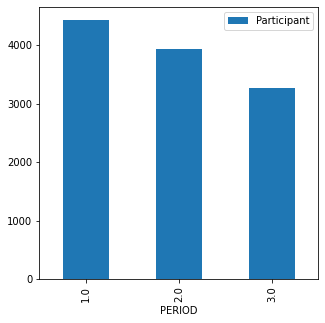

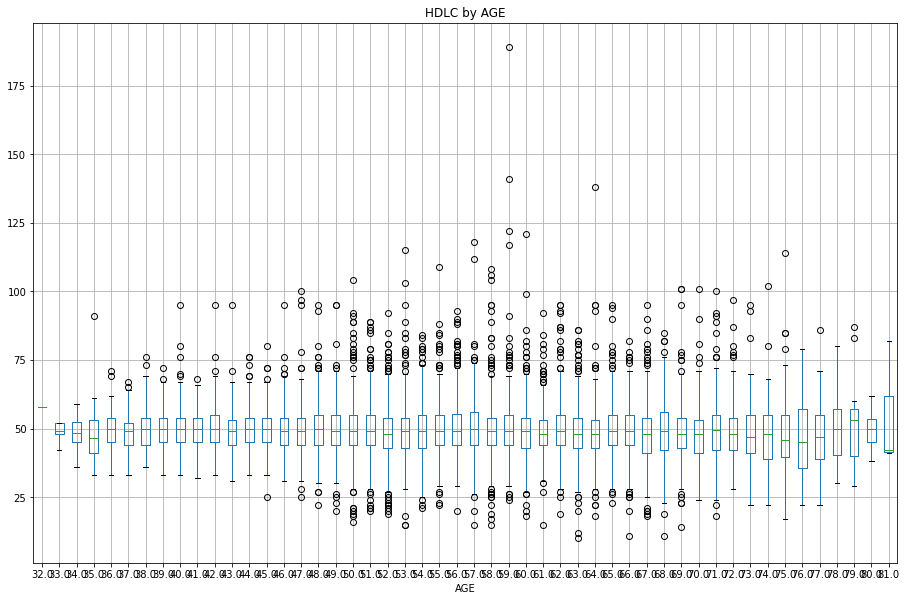

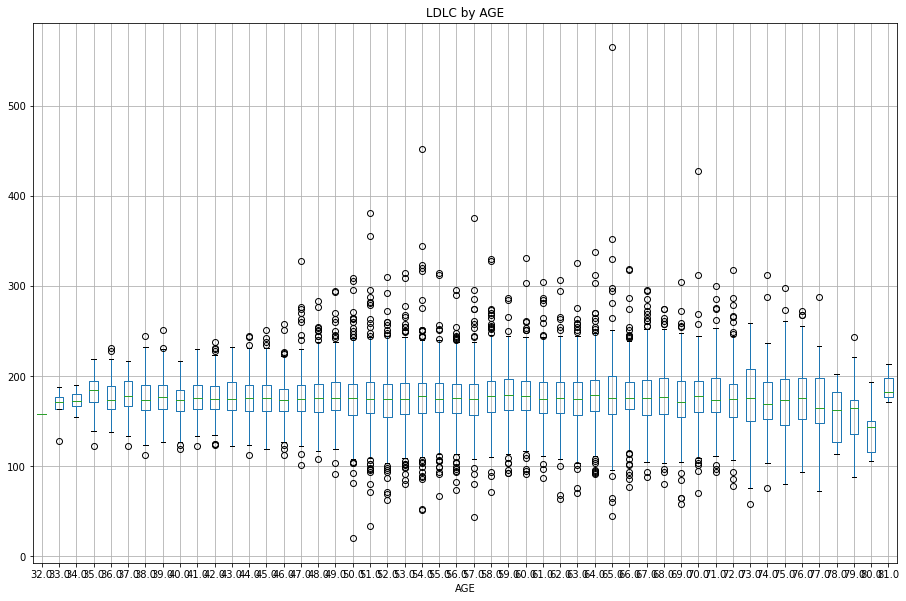

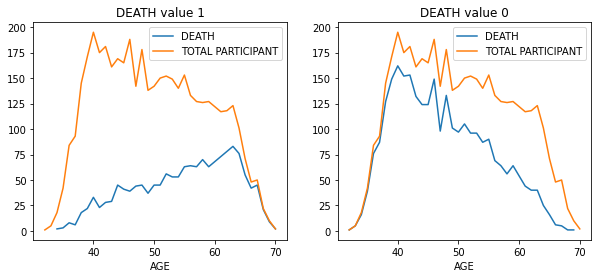

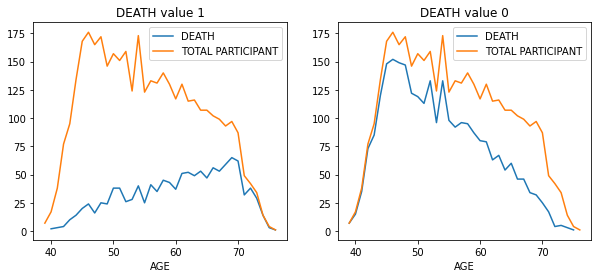

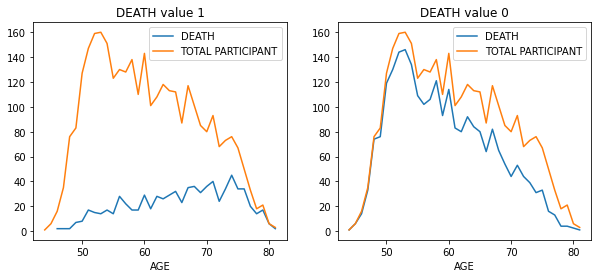

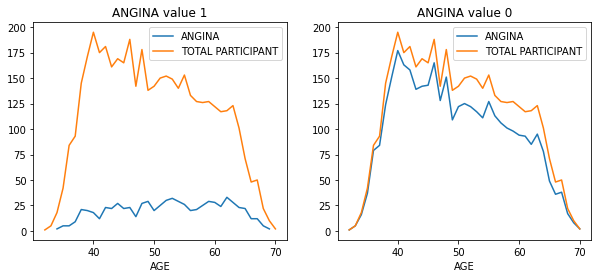

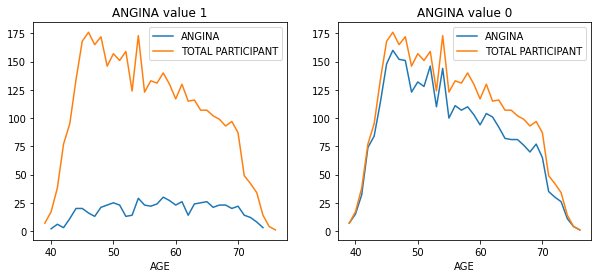

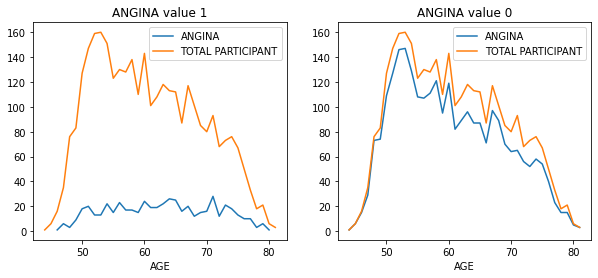

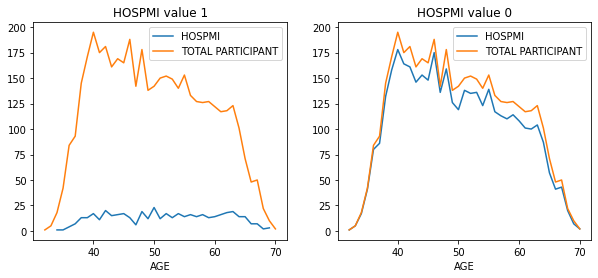

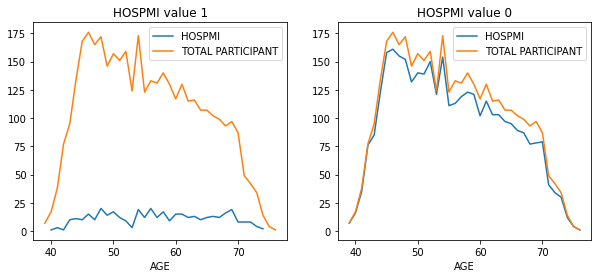

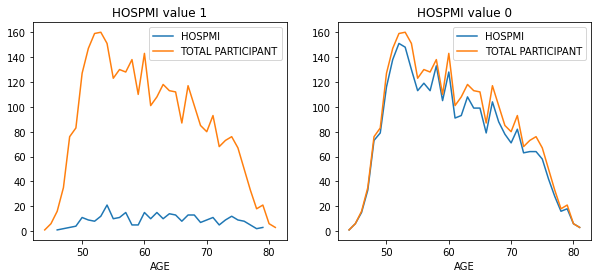

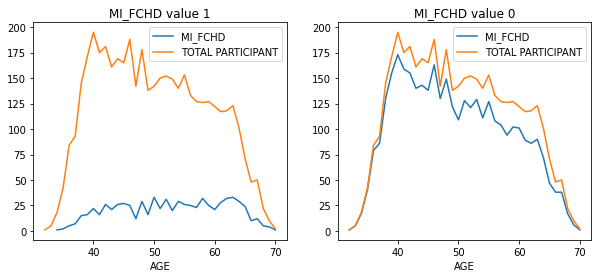

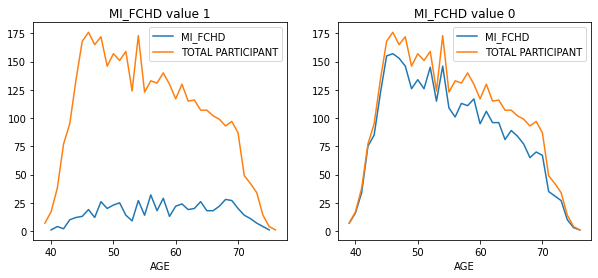

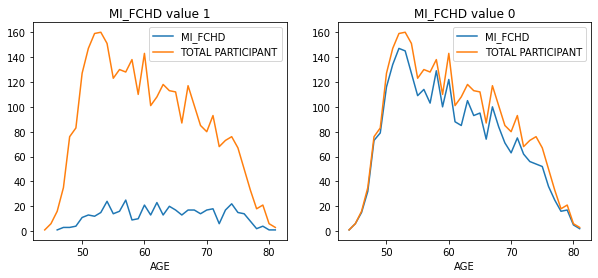

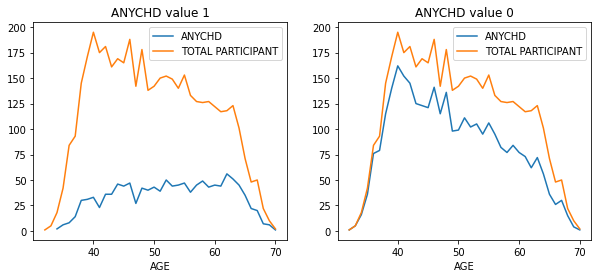

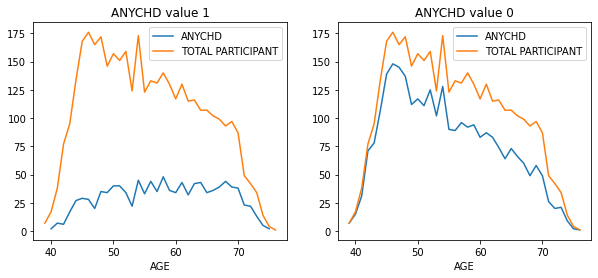

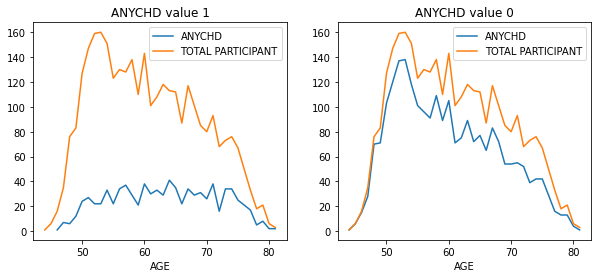

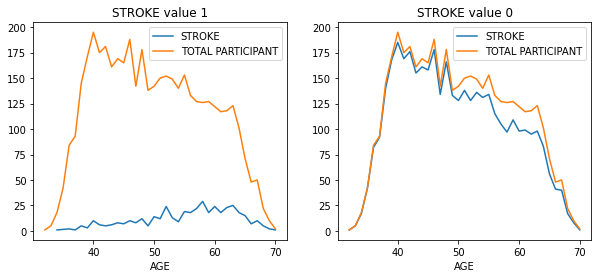

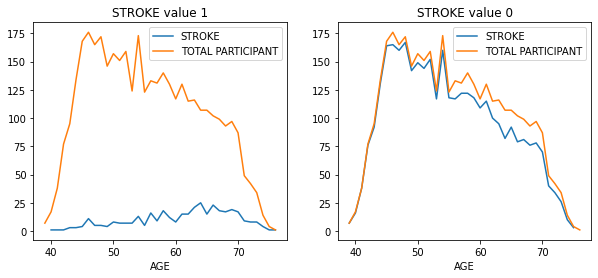

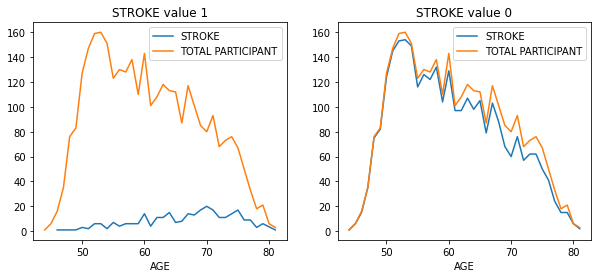

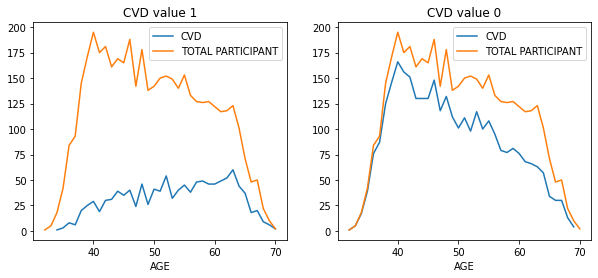

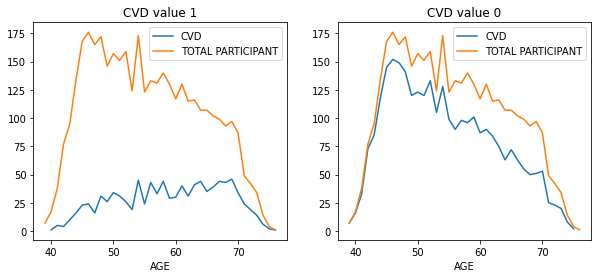

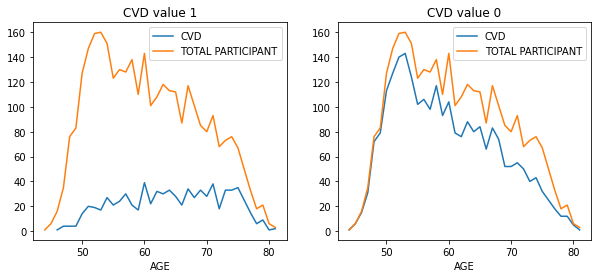

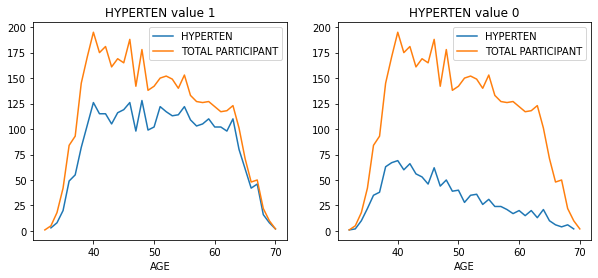

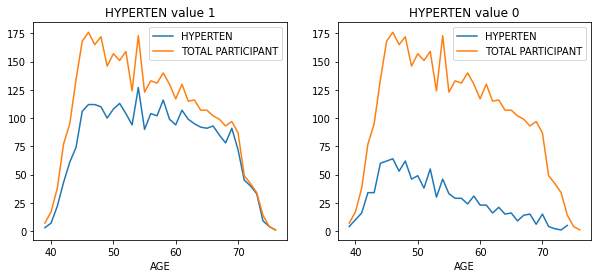

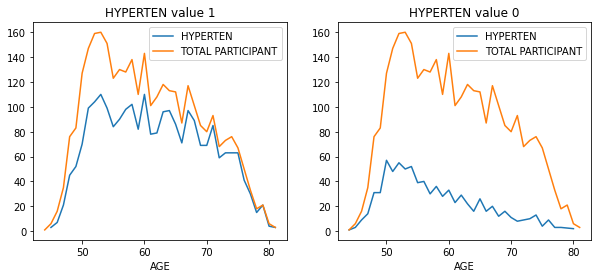

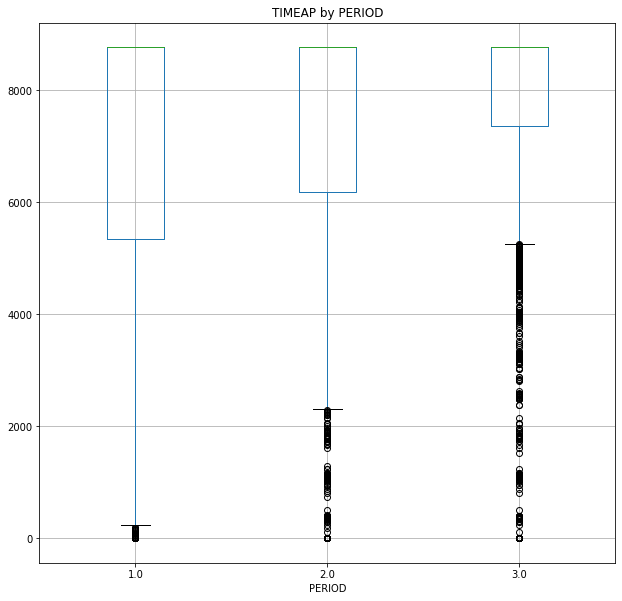

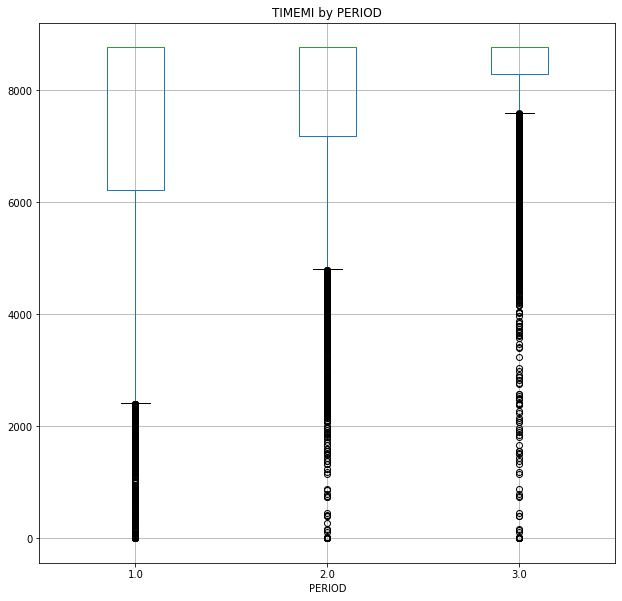

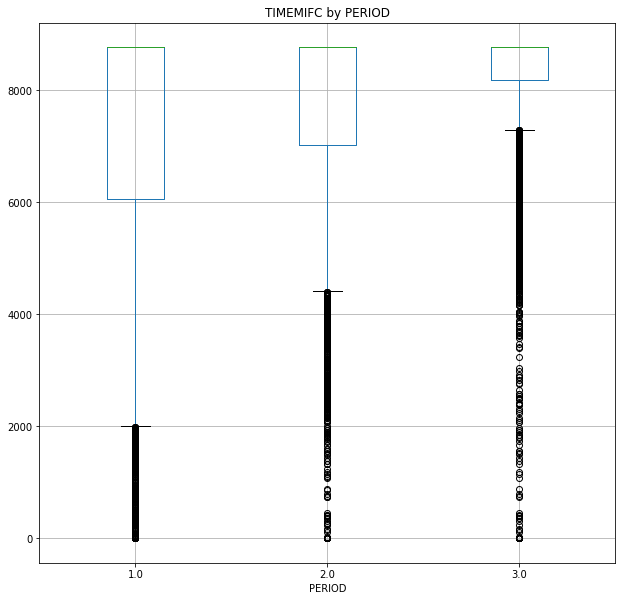

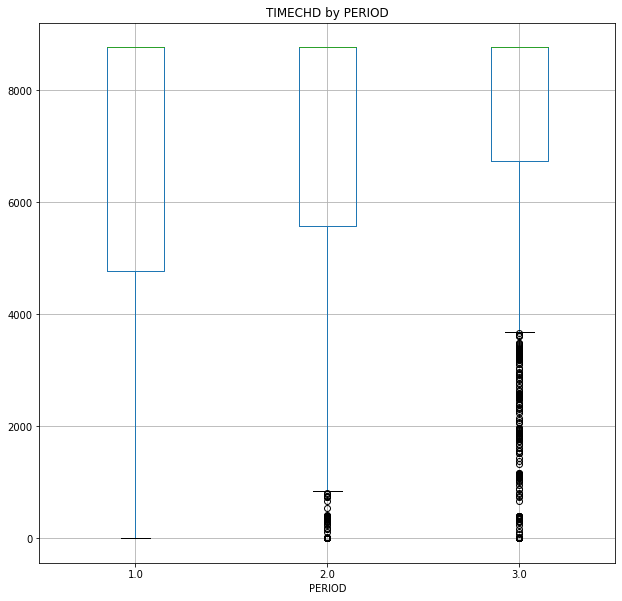

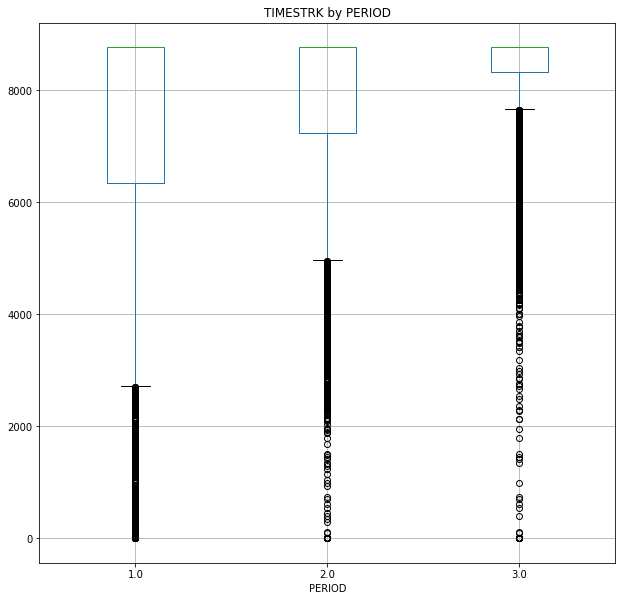

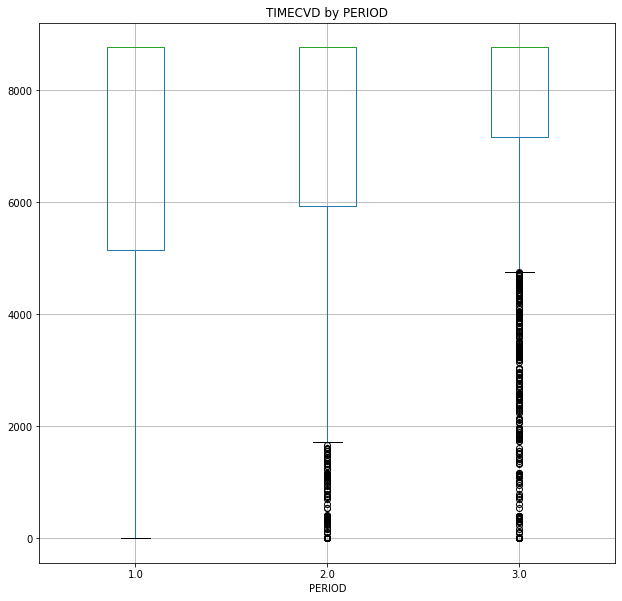

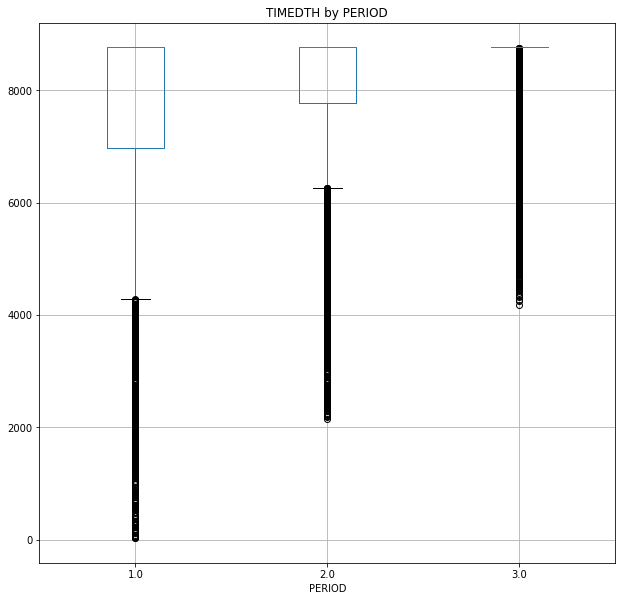

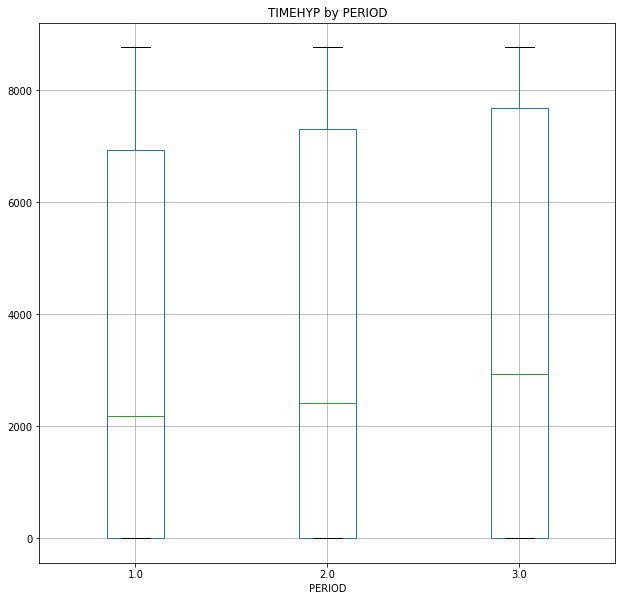

In [19]:
## TODO remove when analysis will be completed

no_need_to_visualized = ['AGE', 'RANDID']
binary_values = ['CURSMOKE', 'SEX', 'DIABETES', 'BPMEDS', 'PREVAP', 'PREVCHD', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'DEATH']
bar_visualization = ['PERIOD']
time_data = ['TIME', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP', 'TIMEDTH']

for col_names in data.columns:
    if col_names in no_need_to_visualized:
        continue
        
    elif col_names in binary_values:
        for period in range(1,4):
            fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
            
            binary_data = data.loc[(data.PERIOD == period), ['AGE', col_names] ]
            ax2 = binary_data[binary_data[col_names] == 0].groupby('AGE').count().plot(ax=ax2)
            binary_data.groupby('AGE').count().plot(ax=ax2, title=col_names + " value 0", label="x")
            ax2.legend([col_names, "TOTAL PARTICIPANT"])

            binary_data = data.loc[(data.PERIOD == period), ['AGE', col_names] ]
            ax1 = binary_data[binary_data[col_names] == 1].groupby('AGE').count().plot(ax=ax1)
            binary_data.groupby('AGE').count().plot(ax=ax1, title=col_names + " value 1", label="x")
            ax1.legend([col_names, "TOTAL PARTICIPANT"])
                 
    elif col_names in bar_visualization:
        bar_visualization_data = data.loc[:, ['AGE', 'PERIOD'] ]
        ax = bar_visualization_data.groupby('PERIOD').count().plot(figsize=(5, 5), kind='bar')
        ax.legend(["Participant"])
        
    elif col_names in time_data:
        data.loc[:, ['PERIOD', col_names] ].boxplot(column=[col_names], by='PERIOD', figsize=(10, 10))
        plt.title(col_names + " by PERIOD")
        plt.suptitle('')
        
    else:
        data.loc[:, ['AGE', col_names] ].boxplot(column=[col_names], by='AGE', figsize=(15, 10))
        plt.title(col_names + " by AGE")
        plt.suptitle('')


## Statistics parameters  <a name="stat_parameter">
    
[Data visualization analysis](#data_visualization_analysis)

* **Box plot** :
 - Q1 = first quartile
 - Q3 = third quartile
 - IQR = Q3 - Q1 (Interquartile range)
 - Min = Q1 - 1.5 IQR
 - Max = Q3 + 1.5 IQR
 - outliers are inferior to Q1 or superior to Q3

## - Experience analysis <a name="experience_analysis">

1. [Death representation](#death_representation)
2. [Gender, number of people and age](#general_informartion)
3. [Period](#period)
4. [Cholesterol rate](#cholesterol_rate)
5. [Systolic blood pressure](#systolic_blood_pressure)
6. [Diastolic blood pressure](#diastolic_blood_pressure)
7. [Anti-hypertensive medication](#anti_hypertensive_medication)
8. [current cigarette smoking](#current_cigarette_smoking)
9. [Number of cigarette per day](#cigarette_per_day)
10. [High density lipoprotein cholesterol](#hdlc)
11. [High density lipoprotein cholesterol](#ldlc)
12. [Body mass index](#bmi)
13. [Casual serum glucose](#glucose)
14. [Prevalent angina pectoris at exam](#prevap)
15. [Prevalent coronary heart disease](#prevchd)
16. [Prevalent myocardial infarction](#prevmi)
17. [Prevalent stroke](#prevstrk)
18. [Prevalent Hypertensive](#prevhyp)
    
[Data visualization analysis](#data_visualization_analysis)

In this dataset, there is two type of data. Booleans for events and numbers for measurements.

### Death representation <a name="death_representation">

[Experience analysis](#experience_analysis)

We wanted to compute the number of people who died between each period. We found that 4434 persons for the first period and 3930 persons for the second period.

Then we substracted the number of death people from the number of patients present in the period one. There is a difference between the number of people in period two and the number we computed. 

In [21]:
data.loc[(data.PERIOD == 1), ['SEX'] ].count().SEX

4434

In [22]:
data.loc[(data.PERIOD == 2), ['SEX'] ].count().SEX

3930

In [23]:
data.loc[(data.PERIOD == 1), ['SEX'] ].count().SEX - data.loc[(data.PERIOD == 1) & (data.DEATH == 1), ['DEATH'] ].count().DEATH

2884

Thanks to that we discovered the notation for death event is to report the event for each period if the person dies during the study.

In [24]:
# Count of death people that are not dead for another period

count = 0
for randid in data.loc[(data.DEATH == 1), ['RANDID']].RANDID:
    if data.loc[(data.DEATH == 0) & (data.RANDID == randid), :].shape[0] != 0:
        count += 1
print(count)

0


### Gender, number of people and age  <a name="general_informartion">

[Experience analysis](#experience_analysis)

In this dataset, there is 4434 in period 1, 3930 in period 2 and 3263 in period 3.
There is also 5022 men (43.19 %) and 6605 women (56.81 %). 

In [25]:
(5022 * 100) / 11627 , (6605 * 100) / 11627 

(43.19256902038359, 56.80743097961641)

The participants are between 32 to 81.

AGE  PERIOD
0      39.0     1.0
2      46.0     1.0
5      48.0     1.0
7      61.0     1.0
9      46.0     1.0
...     ...     ...
11613  48.0     1.0
11616  44.0     1.0
11619  52.0     1.0
11621  40.0     1.0
11624  39.0     1.0

[4434 rows x 2 columns]

AGE  PERIOD
3      46.0     2.0
6      48.0     2.0
8      61.0     2.0
10     45.0     2.0
13     43.0     2.0
...     ...     ...
11614  48.0     2.0
11617  44.0     2.0
11620  52.0     2.0
11622  40.0     2.0
11625  40.0     2.0

[3930 rows x 2 columns]

AGE  PERIOD
1      40.0     3.0
4      46.0     3.0
11     46.0     3.0
14     43.0     3.0
19     45.0     3.0
...     ...     ...
11612  51.0     3.0
11615  48.0     3.0
11618  44.0     3.0
11623  40.0     3.0
11626  38.0     3.0

[3263 rows x 2 columns]

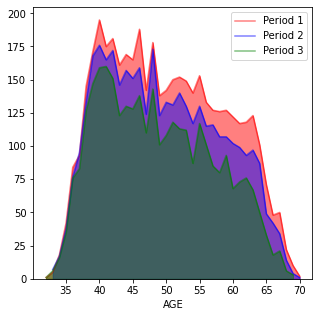

In [26]:
fig, ax = plt.subplots()
colors = ['r', 'b', 'g']
for period in range(1, 4):

    age_visualization_by_period = data.loc[data.PERIOD == period, ['AGE', 'PERIOD'] ]
    
    # Shift 6 years to compare the proportion of people 
    age_visualization_by_period['AGE'] = age_visualization_by_period['AGE'] - (6 * (period - 1) )
    display(age_visualization_by_period)
    
    ax = age_visualization_by_period.groupby('AGE').count().plot(ax = ax, figsize=(5, 5), kind='area', stacked=False, color = colors[period - 1])

ax.legend(["Period 1", "Period 2", "Period 3"])
plt.show()

### Period <a name="period">

[Experience analysis](#experience_analysis)

We wanted to calculate the average time interval between two periods : 

In [27]:
data.loc[(data.PERIOD == 2), ['TIME'] ].TIME.mean() / 365

5.959245703928334

In [28]:
(data.loc[(data.PERIOD == 3), ['TIME'] ].TIME.mean() - data.loc[(data.PERIOD == 2), ['TIME'] ].TIME.mean()) / 365

5.968617133447136

The time interval between 2 periods is on average **6 years**.

###  Systolic blood pressure  <a name="systolic_blood_pressure">
    
[Experience analysis](#experience_analysis)

According to the Centers for Disease Control and Prevention, the normal rate of systolic must be less than 120 mmHg, between 120 and 129 there is a risk of hypertension and above 130, you are hypertensive.
We will analyse how this rate of systolic evolves over period by age.

In [29]:
col_name = 'SYSBP'

For all periods combined, we can establish than only 25% of all patients have a normal rate, more than 50% have hypertension. On average, these patients have high blood pressure.

In [30]:
data.loc[:, ['AGE', col_name] ].SYSBP.describe()

count    11627.000000
mean       136.323987
std         22.797013
min         84.000000
25%        120.000000
50%        132.000000
75%        149.000000
max        295.000000
Name: SYSBP, dtype: float64

For the first period, more than 50% patients under 47 years have a normal rate of systolic and beyond this age, only 25% have a normal rate of sytolic. Almost 75% below 47 years are risky to be hypertensive.
From 58 years, almost 50% of patients are hypertensive. <br/>
In period 2, less than 25% of the patients have a normal rate systolic. <br/>
In this third period, almost all patients are below the normal and their systolic are move elevated than risky.


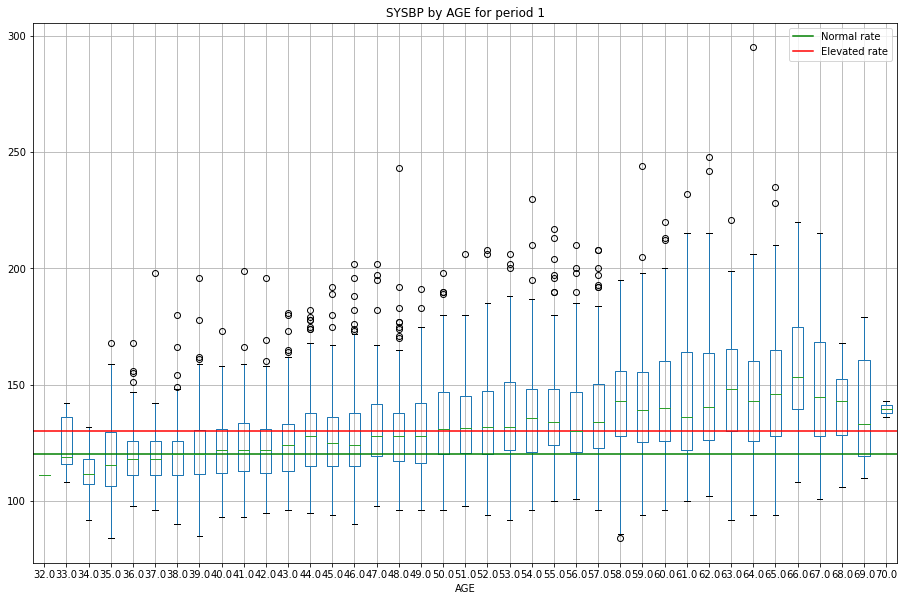

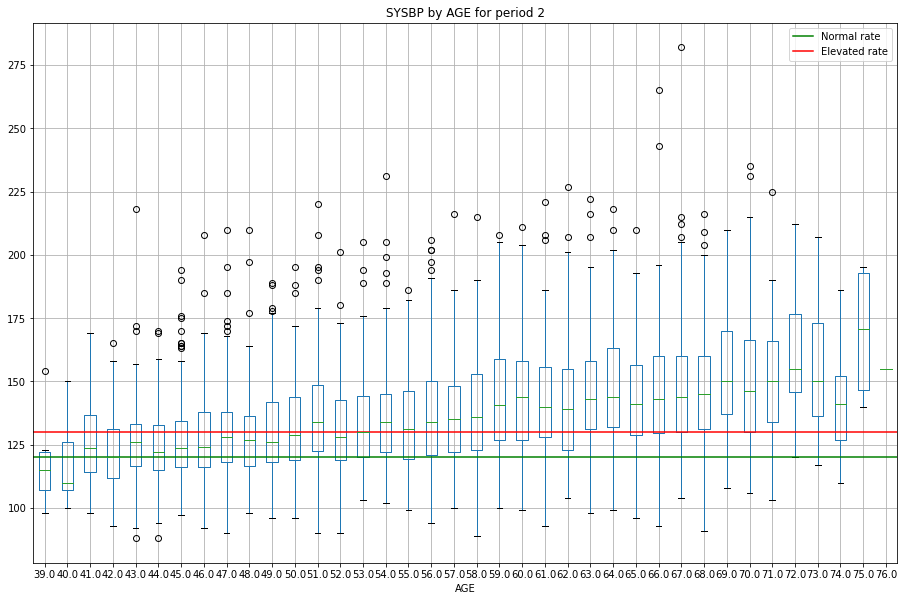

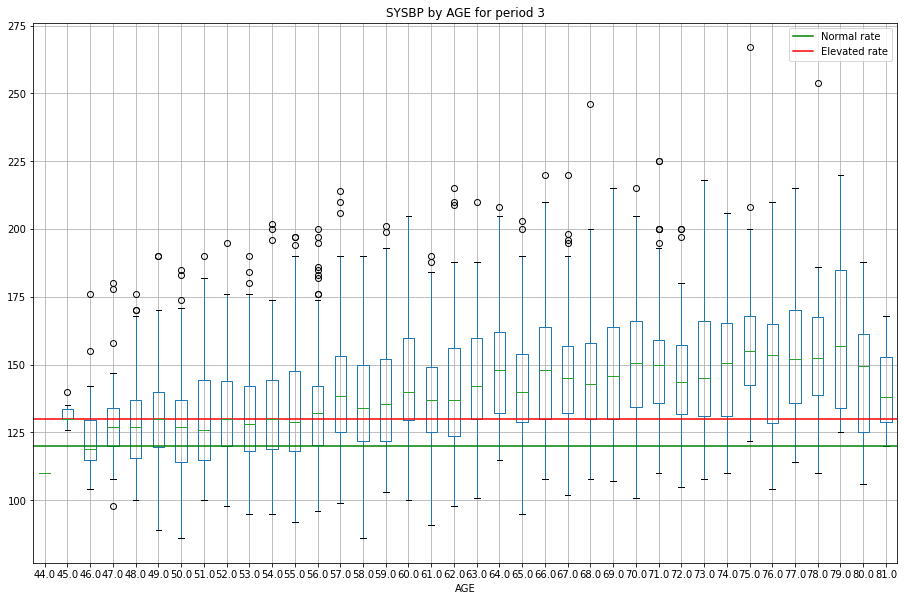

In [31]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    normal = plt.axhline(y=120, color='g', linestyle='-')
    risky = plt.axhline(y=130, color='r', linestyle='-')
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')
    plt.legend([normal, risky], ['Normal rate', 'Elevated rate'])

Source : https://www.cdc.gov/bloodpressure/about.htm

###  Diastolic blood pressure <a name="diastolic_blood_pressure">
    
[Experience analysis](#experience_analysis)

According to the Centers for Disease Control and Prevention, the normal rate diastolyc is less than 80 mm Hg. We will compare rate of diastolic to the normal.

In [32]:
col_name = 'DIABP'

For all periods combined only 25% of patients have a normal rate of diastolic and on average they have elevated diastolic

In [33]:
data.loc[:, ['AGE', col_name] ].DIABP.describe()

count    11627.000000
mean        83.035693
std         11.659832
min         30.000000
25%         75.000000
50%         82.000000
75%         90.000000
max        150.000000
Name: DIABP, dtype: float64

For the three periods, almost 50% have a normal diastolic.

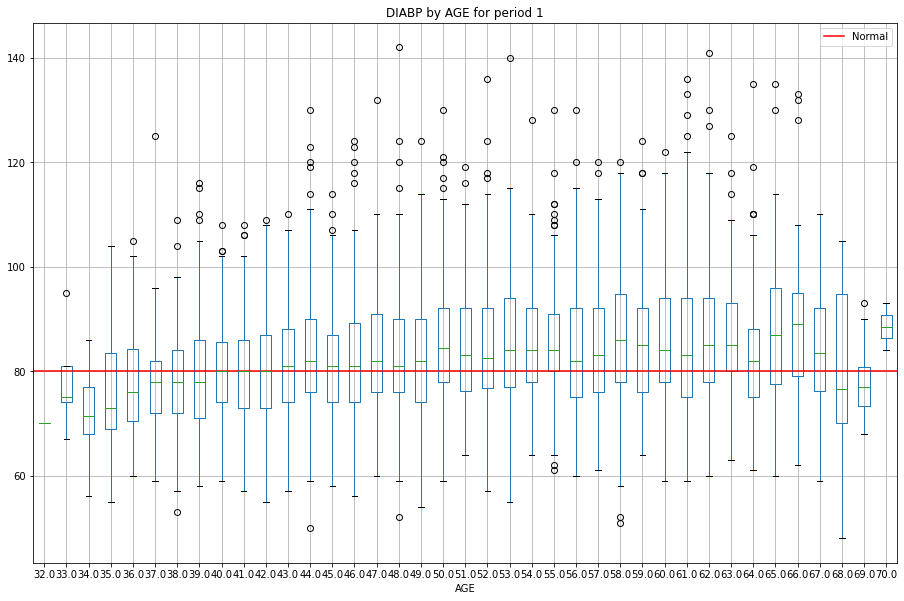

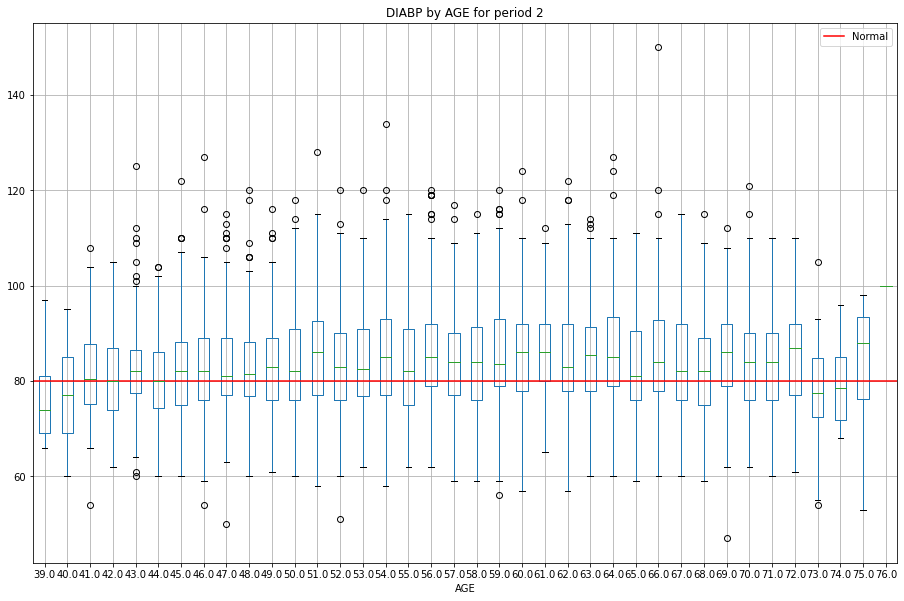

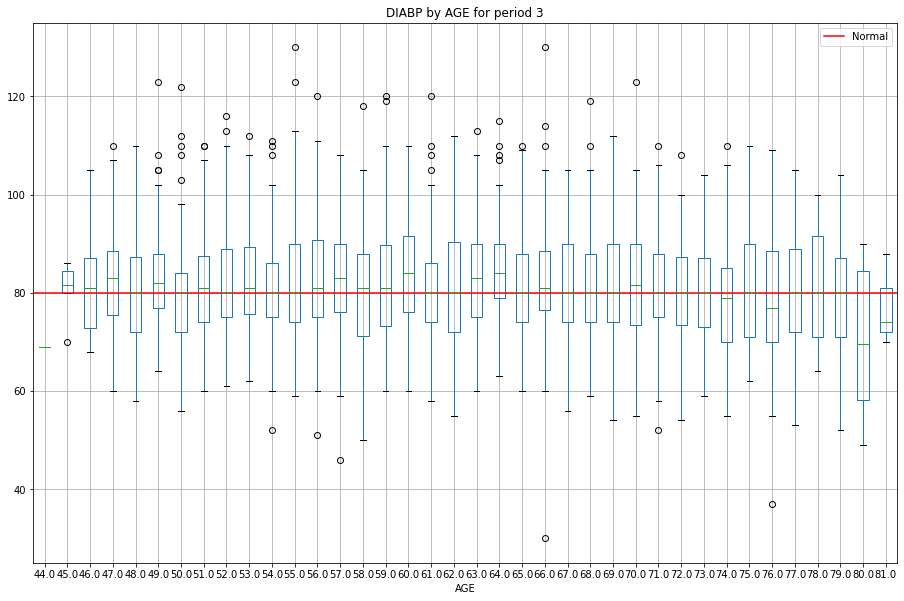

In [34]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    normal = plt.axhline(y=80, color='r', linestyle='-')
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')
    plt.legend([normal], ['Normal'])

###  Use of anti-hypertensive medication <a name="anti_hypertensive_medication">
    
[Experience analysis](#experience_analysis)

In [35]:
col_name = 'BPMEDS'

For the three preiods combined, We only have 8.56% of patients using this medication and 91.44% who don't.

In [36]:
(data.groupby('BPMEDS').size()/data['BPMEDS'].count())*100

BPMEDS
0.0    91.760557
1.0     8.239443
dtype: float64

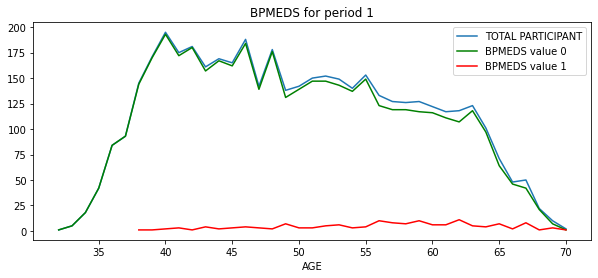

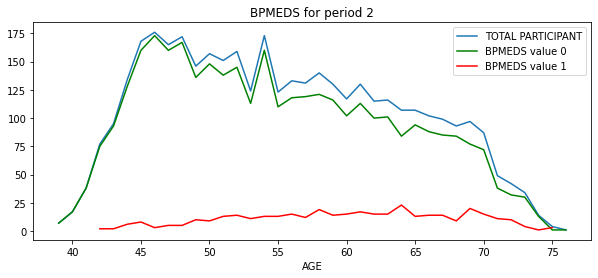

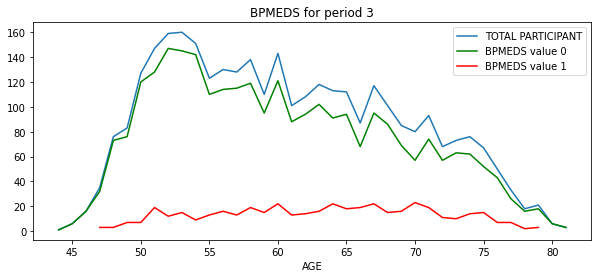

In [37]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period), color='r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    ax1
    plt.show()

###  Current cigarette smoking <a name="current_cigarette_smoking">
    
[Experience analysis](#experience_analysis)

In [38]:
col_name = 'CURSMOKE'

For all periods combined, we have 43.25% smokers and 56.75% who don't smoke.

In [39]:
(data.groupby('CURSMOKE').size()/data['CURSMOKE'].count())*100

CURSMOKE
0.0    56.747226
1.0    43.252774
dtype: float64

In period 1 and 2 we can see that up to 50 years old, we have more smokers than non. In period 3, generally we have less smokers than non.

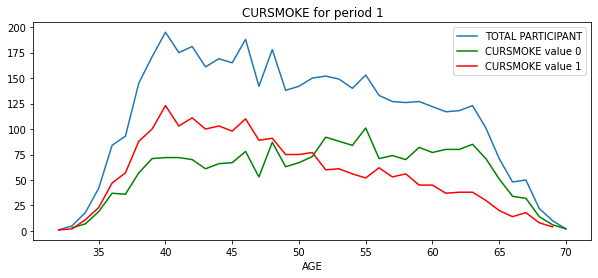

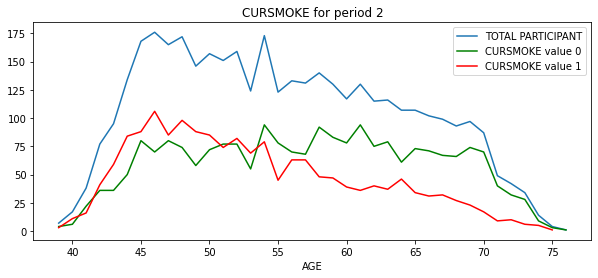

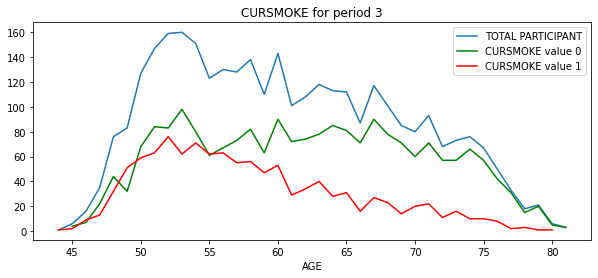

In [40]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period), color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Number of cigarette per day <a name="cigarette_per_day">
    
[Experience analysis](#experience_analysis)

In [41]:
col_name = 'CIGPDAY'

According to the previous analys, for all periods combined more than 50% don't smoke so have 0 cigarettes per day. 75% smoke about 20 cigarettes per day.

In [42]:
data.loc[:, ['AGE', col_name] ].CIGPDAY.describe()

count    11627.000000
mean         8.251828
std         12.163682
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max         90.000000
Name: CIGPDAY, dtype: float64

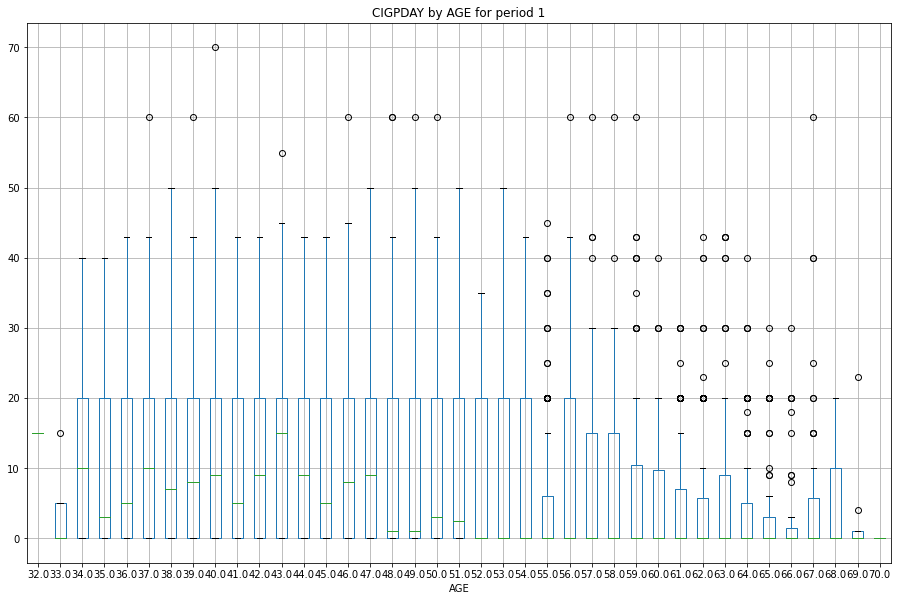

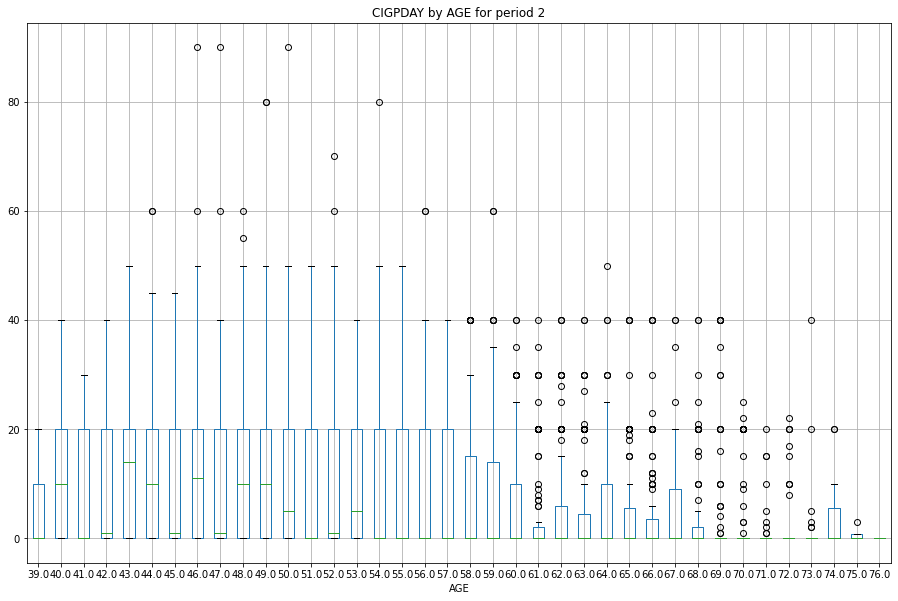

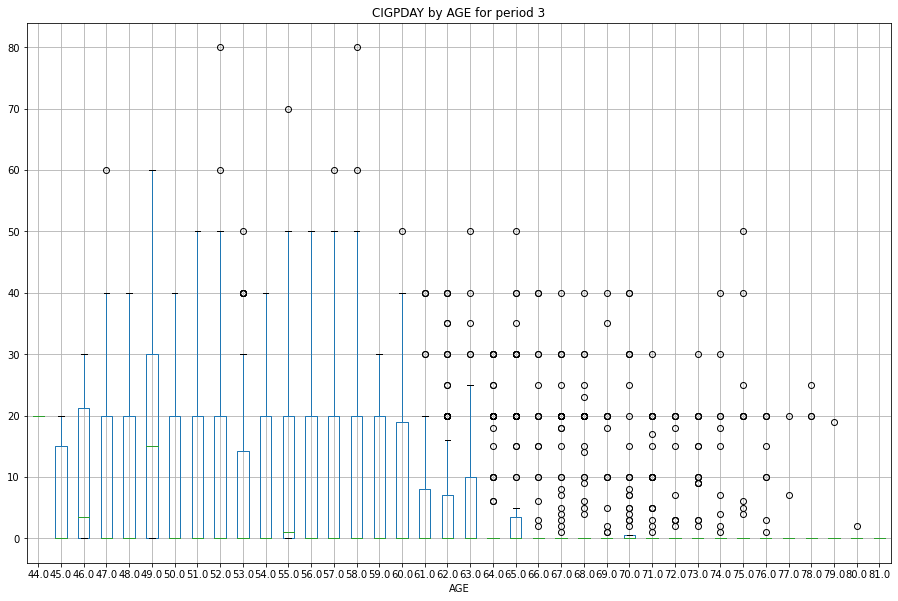

In [43]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

### Cholesterol rate <a name="cholesterol_rate">
    
[Experience analysis](#experience_analysis)

According to Medline Plus, the normal rate of total cholesterol for anyone age 20 or older, 125 to 200mg/dL

In [44]:
col_name = 'TOTCHOL'

For all periods combined, less than 25% of patients have a normal rate, on average it is over 200mg/dL.

In [45]:
data.loc[:, ['AGE', col_name] ].TOTCHOL.describe()

count    11627.000000
mean       241.233078
std         44.827015
min        107.000000
25%        210.000000
50%        238.000000
75%        268.000000
max        696.000000
Name: TOTCHOL, dtype: float64

In periods 1, 2 and 3 less than 25% f patients have a normal rate of total cholesterol.

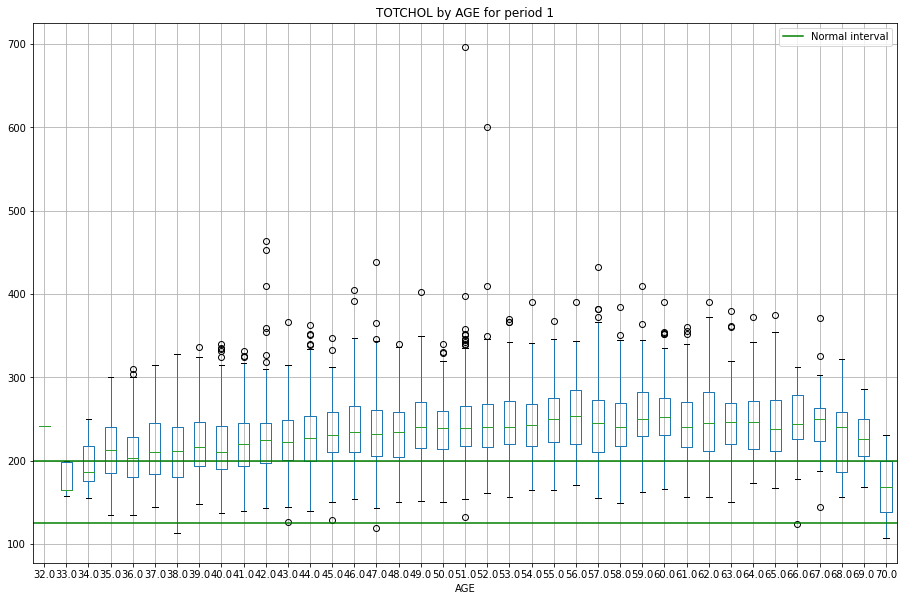

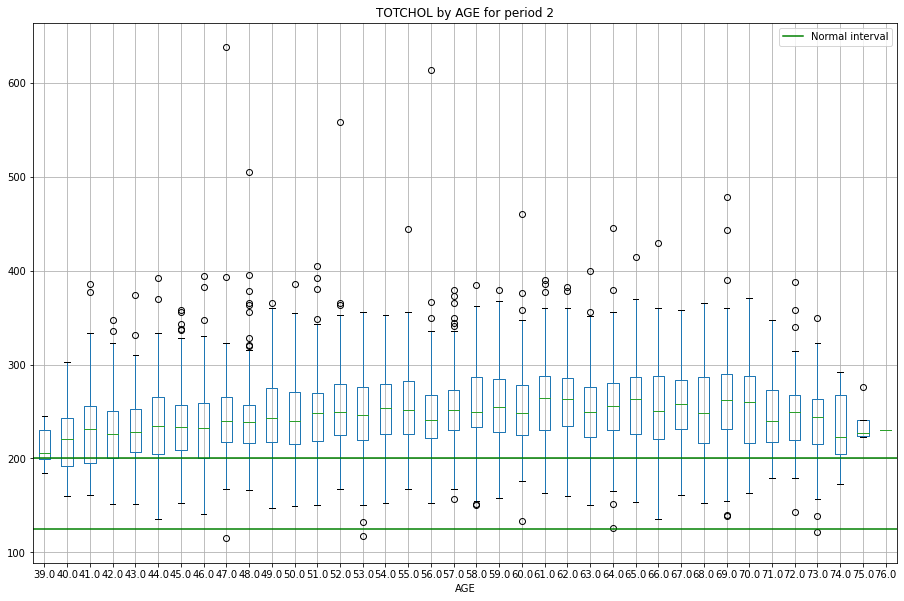

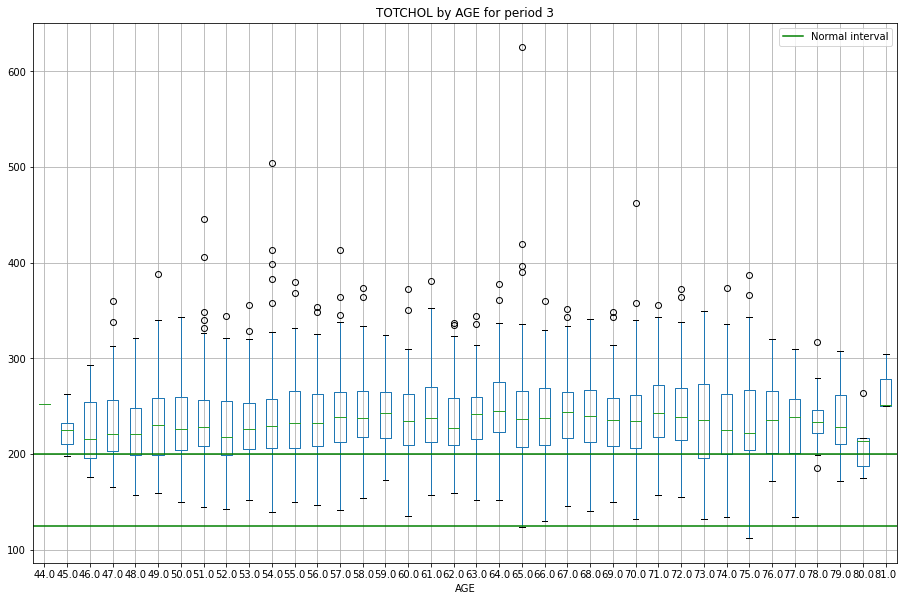

In [46]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    ok = plt.axhline(y=125, color='g', linestyle='-')
    ok = plt.axhline(y=200, color='g', linestyle='-')
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')
    plt.legend([ok], ['Normal interval'])

Source : https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html

###  High density lipoprotein cholesterol <a name="hdlc">
    
Measurement unit : **mg/dL**
Available for period 3 only
    
[Experience analysis](#experience_analysis)

The normal rate of HDL is from 40mg/dL for a men and 50mg/dL for women.

In [47]:
col_name = 'HDLC'

For the three periods combined, more than 75% of men patients and 50% of women have more than the normal rate of HDL. On average, they have normal rate.

In [48]:
data.loc[:, ['AGE', 'SEX', col_name] ].groupby('SEX').HDLC.describe()

count       mean        std   min   25%   50%   75%    max
SEX                                                             
0.0  6605.0  51.092506  10.374648  11.0  45.0  50.0  56.0  189.0
1.0  5022.0  47.318200   9.204611  10.0  42.0  47.0  52.0  138.0

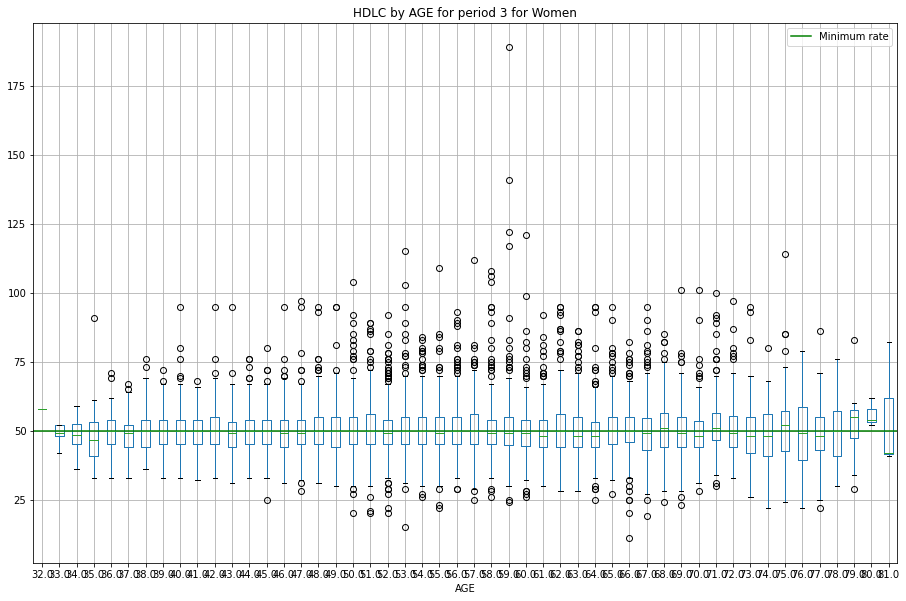

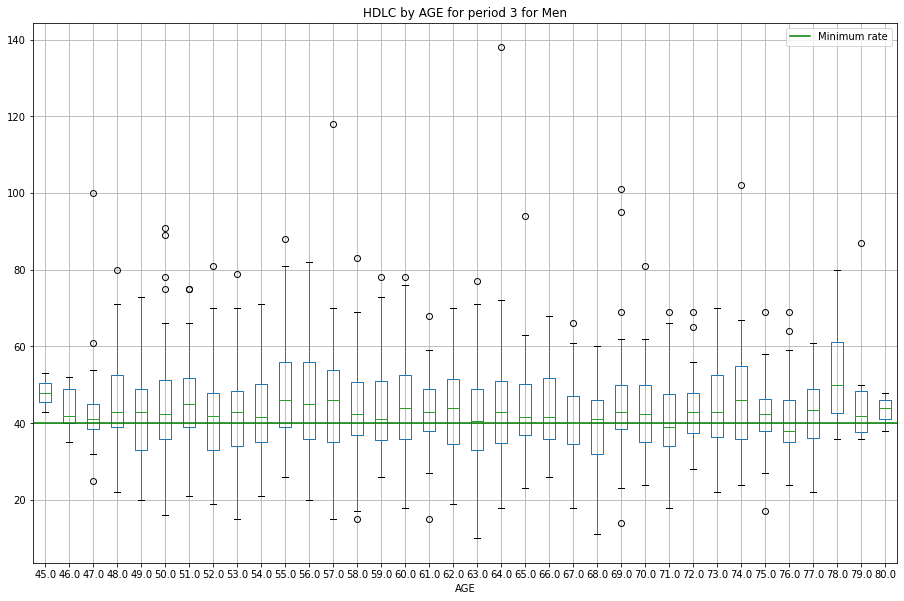

In [49]:
period = 3
for sex in range (0, 2):
    data.loc[((data.PERIOD == period) & data.SEX == sex), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    y = 50 if sex == 0 else 40
    normal = plt.axhline(y=y, color='g', linestyle='-')
    gender = 'Women' if sex == 0 else 'Men'
    plt.title(col_name + " by AGE for period " + str(period) + " for " + gender)
    plt.suptitle('')
    plt.legend([normal], ['Minimum rate'])

###  Low density lipoprotein cholesterol <a name="ldlc">
    
Measurement unit : **mg/dL**
Available for period 3 only
    
[Experience analysis](#experience_analysis)

Normal rate of LDL is less than 100mg/DL for anyone.

In [50]:
col_name = 'LDLC'

For the three combined periods, more than 75% of patients have a LDL greater than the normal rate. On average, patients have high LDL.

In [51]:
data.loc[:, ['AGE', col_name] ].LDLC.describe()

count    11627.000000
mean       176.594736
std         30.183937
min         20.000000
25%        160.000000
50%        176.000000
75%        193.000000
max        565.000000
Name: LDLC, dtype: float64

Text(0.5, 0.98, '')

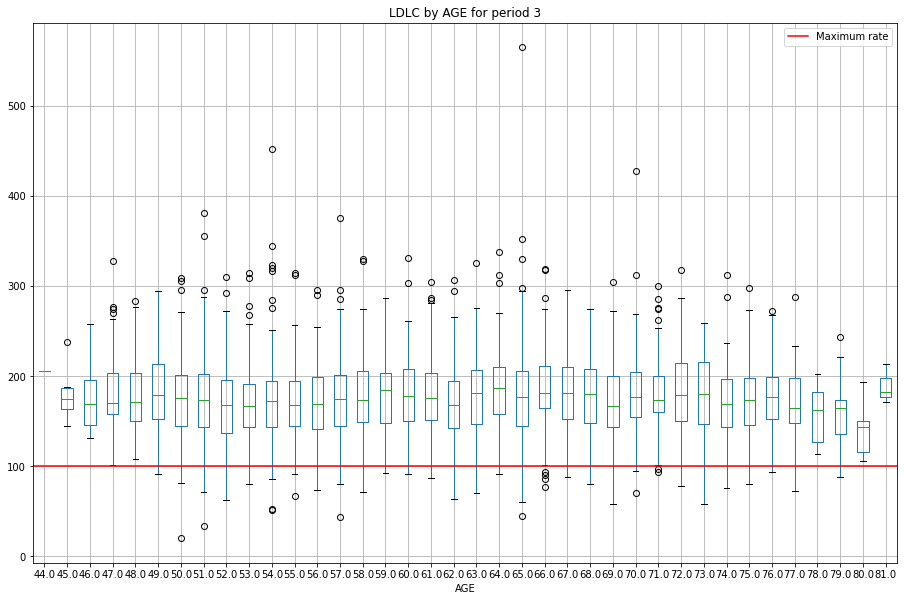

In [52]:
period = 3
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.title(col_name + " by AGE for period " + str(period))
normal = plt.axhline(y=100, color='r', linestyle='-')
plt.legend([normal], ['Maximum rate'])
plt.suptitle('')

###  Body mass index <a name="bmi">
    
BMI = weight[kg] /height²[m²]
    
[Experience analysis](#experience_analysis)

Body mass indicator

|  BMI | Weitght Status |
| --- | --- |
| Below 18.5 |	    Underweight |
| 18.5 – 24.9 |	Healthy Weight |
| 25.0 – 29.9 |	Overweight |
| 30.0 and Above | 	Obesity |

In [53]:
col_name = 'BMI'

For all the three periods combined, **more than 50% of patients are overweight**.

In [54]:
data.loc[:, ['AGE', col_name] ].BMI.describe()

count    11627.000000
mean        25.877791
std          4.098318
min         14.430000
25%         23.100000
50%         25.480000
75%         28.060000
max         56.800000
Name: BMI, dtype: float64

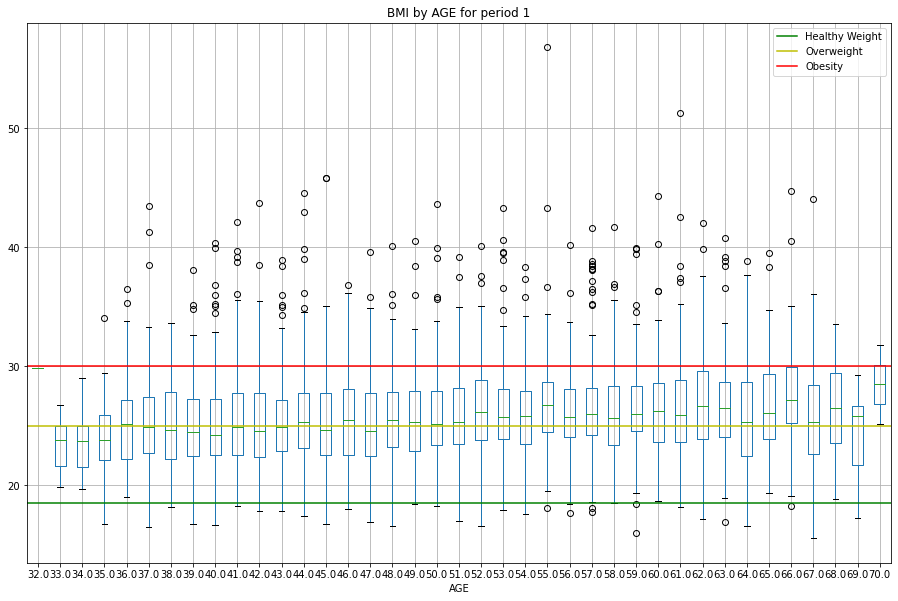

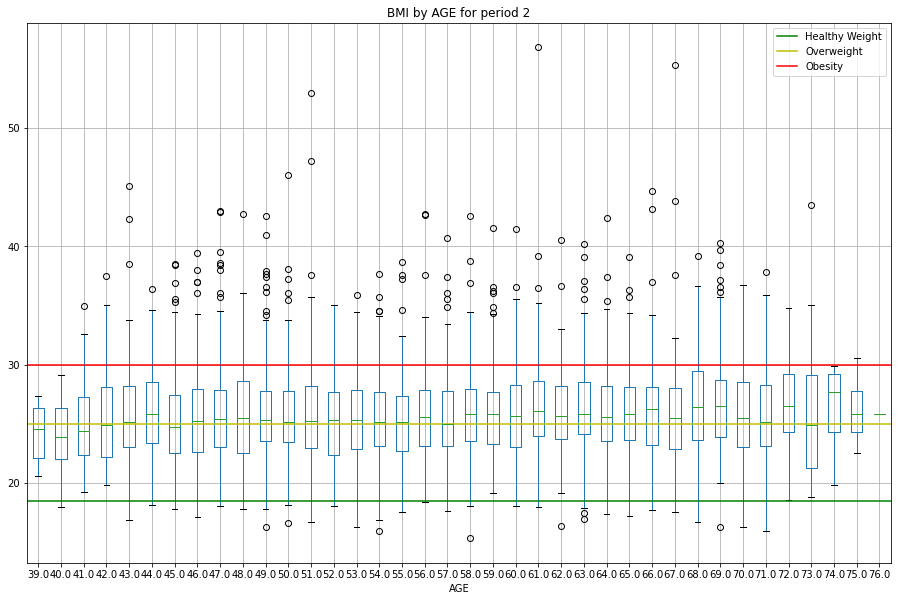

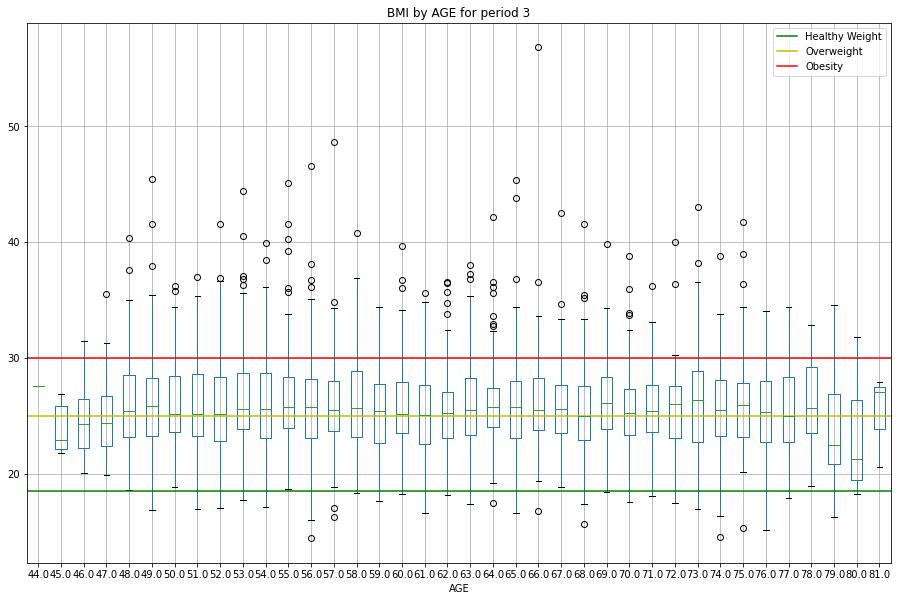

In [55]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')
    healthy = plt.axhline(y=18.5, color='g', linestyle='-')
    over = plt.axhline(y=25, color='y', linestyle='-')
    obese = plt.axhline(y=30, color='r', linestyle='-')
    plt.legend([healthy, over, obese], ['Healthy Weight', 'Overweight', 'Obesity'])

###  Casual serum glucose <a name="glucose">
    
Measurement unit : **mg/dL**
    
[Experience analysis](#experience_analysis)

|Glucose status| GLucose rate|
|--|--|
|Diabetes |	200 mg/dL or above 	|
|Prediabetes |140 – 199 mg/dL|
|Normal| 140 mg/dL or below|

In [56]:
col_name = 'GLUCOSE'

For the three periods combined, more than 75% of patients have a normal glucose rate. On average, they are normal

In [57]:
data.loc[:, ['AGE', col_name] ].GLUCOSE.describe()

count    11627.000000
mean        84.053496
std         23.803934
min         39.000000
25%         73.000000
50%         80.000000
75%         89.000000
max        478.000000
Name: GLUCOSE, dtype: float64

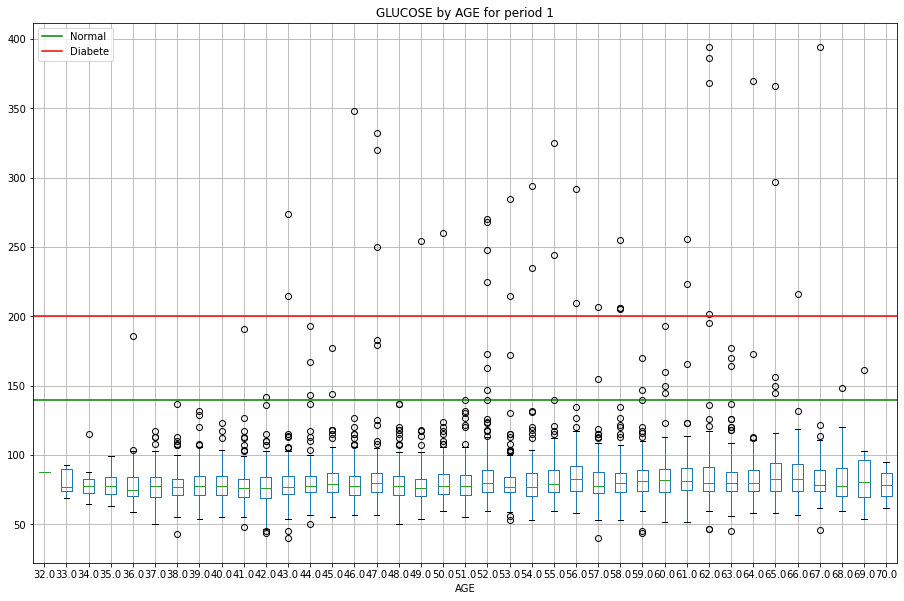

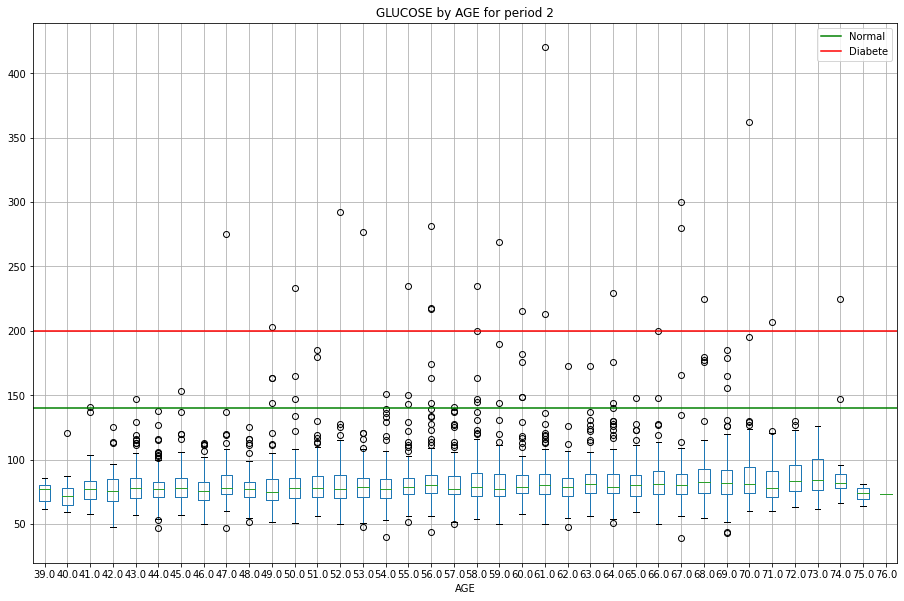

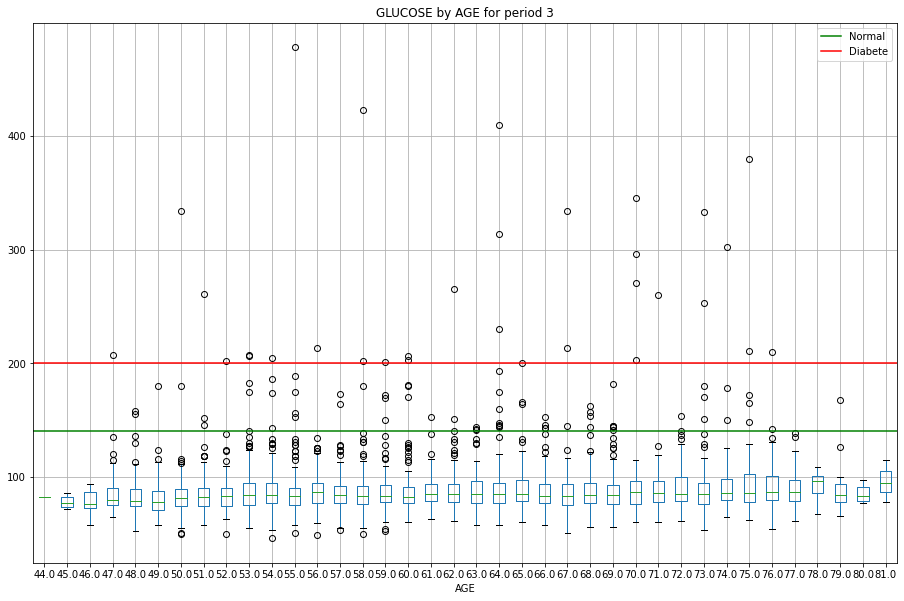

In [58]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')
    normal = plt.axhline(y=140, color='g', linestyle='-')
    diabete = plt.axhline(y=200, color='r', linestyle='-')
    plt.legend([normal, diabete], ['Normal', 'Diabete'])

###  Diabetes <a name="diabetes">
    
Diabetic according to criteria of first exam treated or first exam with casual glucose of 200 mg/DL or more
    
[Experience analysis](#experience_analysis)

In [59]:
col_name = 'DIABETES'
groupby_arg = 'AGE'

For the three periods combined, only 4.56% are diabetics and 95.44 are not.

In [60]:
(data.groupby('DIABETES').size()/data['DIABETES'].count())*100

DIABETES
0.0    95.441644
1.0     4.558356
dtype: float64

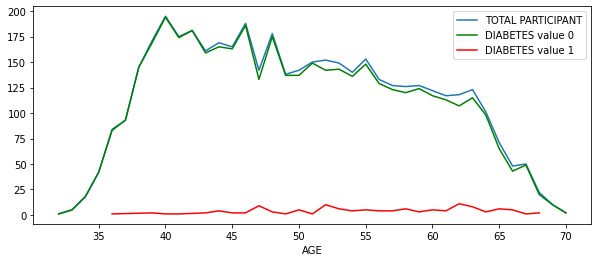

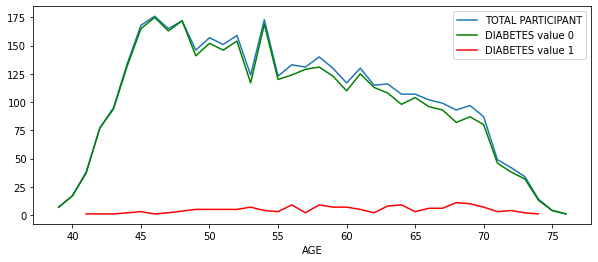

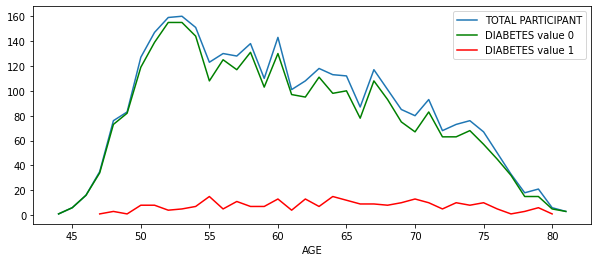

In [61]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1, color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Heart rate <a name="heartrte">
    
Ventricular rate in beats/min.
        
[Experience analysis](#experience_analysis)

The normal heart rate depends on age so we will not do an analyse as the other.

In [62]:
col_name = 'HEARTRTE'
groupby_arg = 'AGE'

for the three periods combined, on average the heart rate eguals to 76.

In [63]:
data.loc[:, ['AGE', col_name] ].HEARTRTE.describe()

count    11627.000000
mean        76.786703
std         12.462719
min         37.000000
25%         69.000000
50%         75.000000
75%         85.000000
max        220.000000
Name: HEARTRTE, dtype: float64

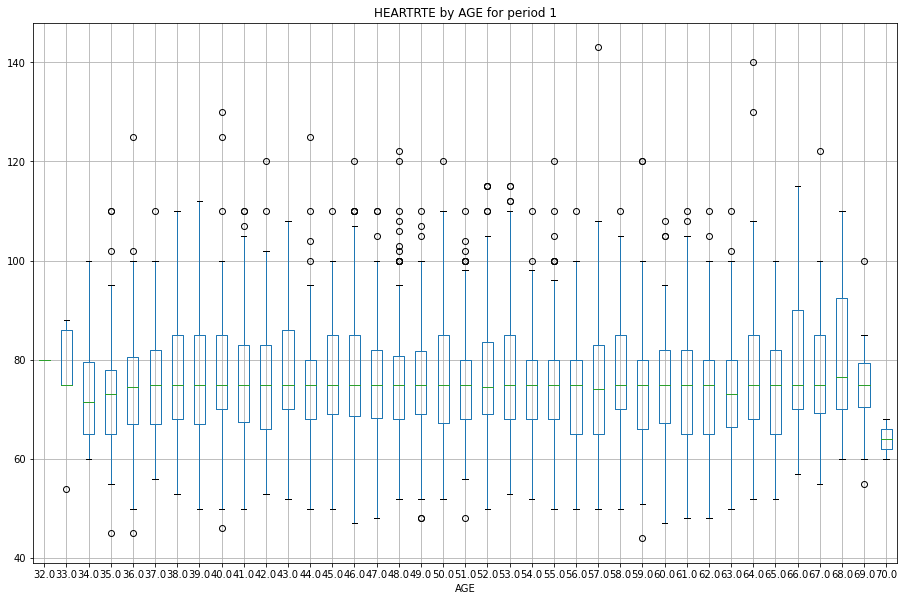

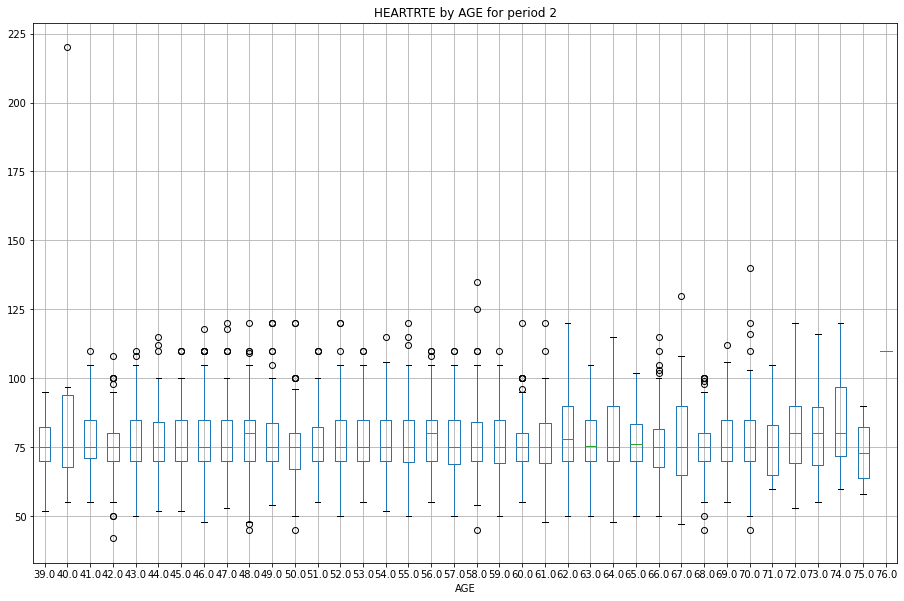

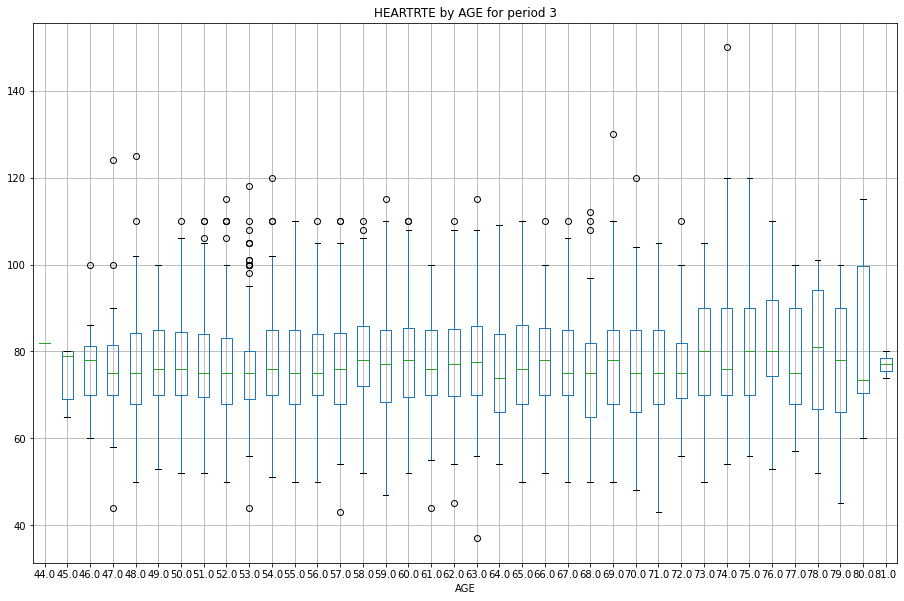

In [64]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

###  Prevalent angina pectoris at exam <a name="prevap">
    
    
[Experience analysis](#experience_analysis)

In [65]:
col_name = 'PREVAP'
groupby_arg = 'AGE'

For the three periods combined, 94.61 are prevalent for angina and 5.39 are not

In [66]:
(data.groupby('PREVAP').size()/data['PREVAP'].count())*100

PREVAP
0.0    94.607379
1.0     5.392621
dtype: float64

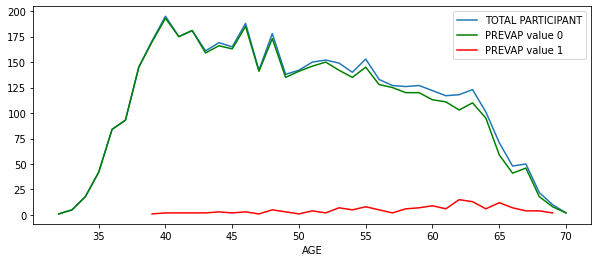

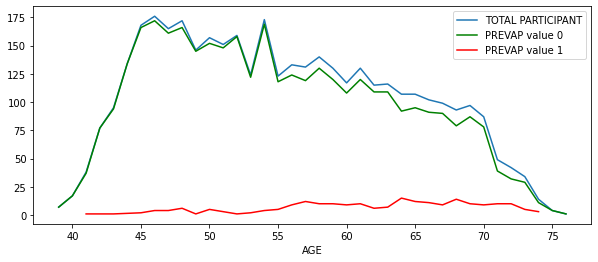

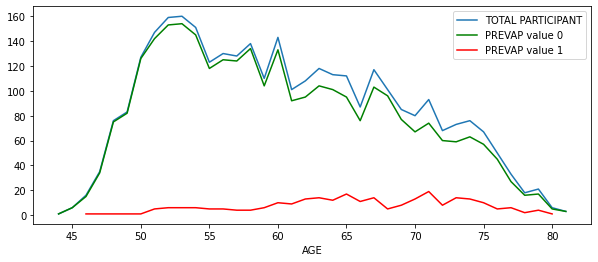

In [67]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1, color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent coronary heart Disease <a name="prevchd">
    
    
[Experience analysis](#experience_analysis)

In [68]:
col_name = 'PREVCHD'
groupby_arg = 'AGE'

For the three periods combined, we have 92.76 who are prevalent for coronary heart and 7.24 are not

In [69]:
(data.groupby('PREVCHD').size()/data['PREVCHD'].count())*100

PREVCHD
0.0    92.758235
1.0     7.241765
dtype: float64

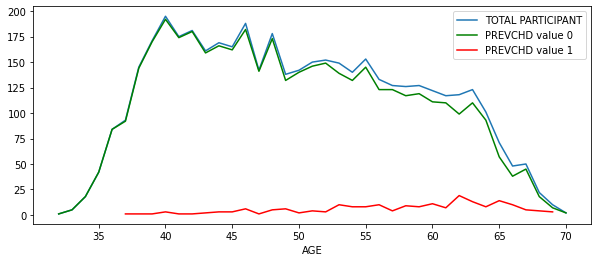

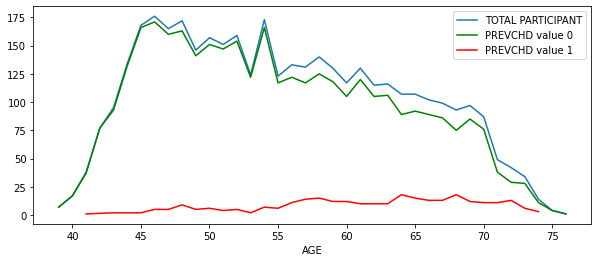

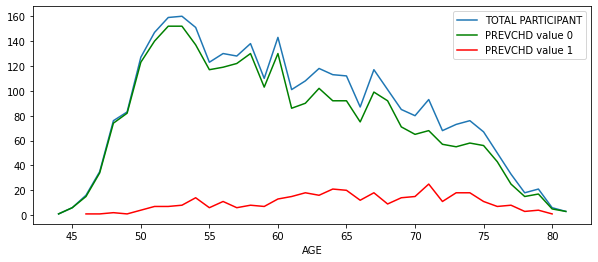

In [70]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1, color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent myocardial infarction <a name="prevmi">
    
[Experience analysis](#experience_analysis)

In [71]:
col_name = 'PREVMI'
groupby_arg = 'AGE'

For the three periods we have 96.78% of patients who are prevalent  and for myocardial 3.22 are not

In [72]:
(data.groupby('PREVMI').size()/data['PREVMI'].count())*100

PREVMI
0.0    96.783349
1.0     3.216651
dtype: float64

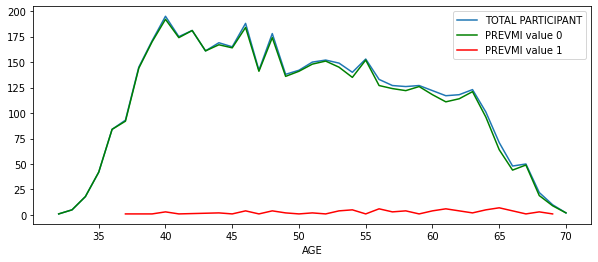

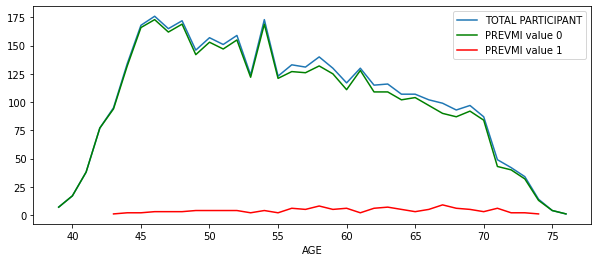

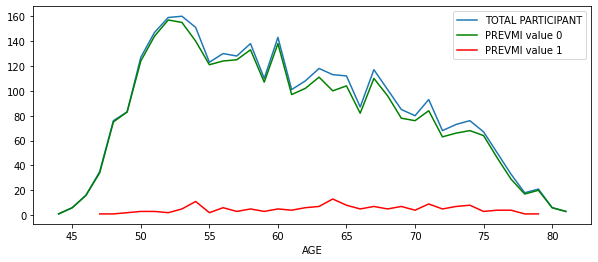

In [73]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1, color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent stroke <a name="prevstrk">
    
    
[Experience analysis](#experience_analysis)

In [74]:
col_name = 'PREVSTRK'
groupby_arg = 'AGE'

For the three periods combined we have 98.69% prevalent for stroke and only 1.31% are not.

In [75]:
(data.groupby('PREVSTRK').size()/data['PREVSTRK'].count())*100

PREVSTRK
0.0    98.692698
1.0     1.307302
dtype: float64

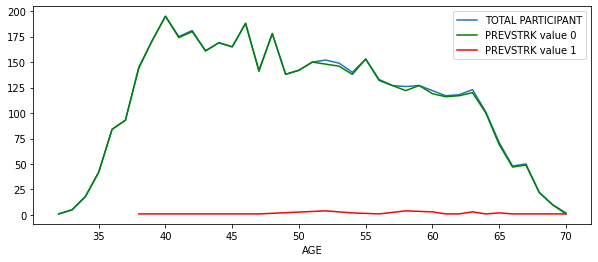

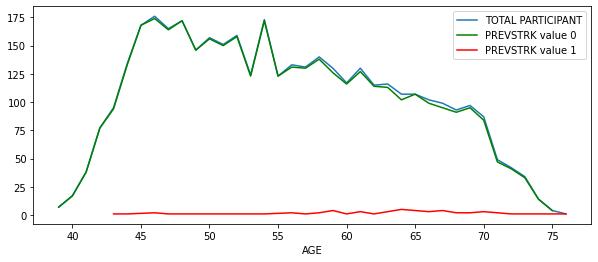

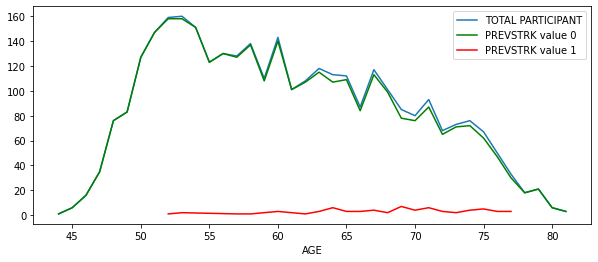

In [76]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1, color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent hypertensive <a name="prevhyp">
    
[Experience analysis](#experience_analysis)

In [77]:
col_name = 'PREVHYP'
groupby_arg = 'AGE'

For the three periods combined we have 54.04% of patients prevalent for hypertensive and 45.96% who are not.

In [78]:
data.loc[:, ['AGE', col_name] ].PREVHYP.mean()

0.4596198503483272

For the first period, the non prevalent curve is upper than the prevalent one but decreases during period 2 and 3.

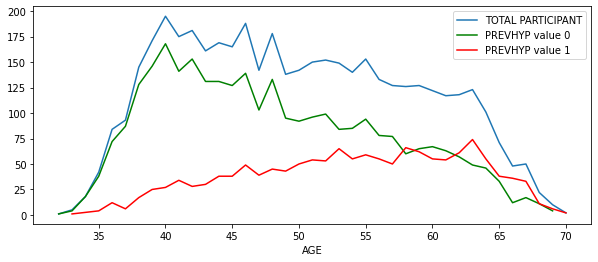

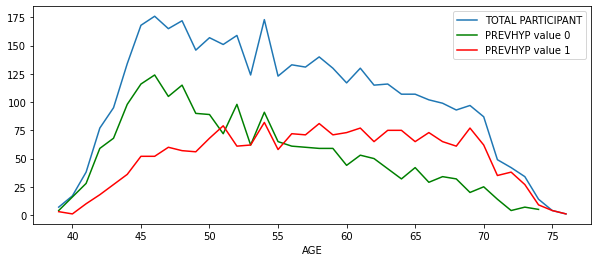

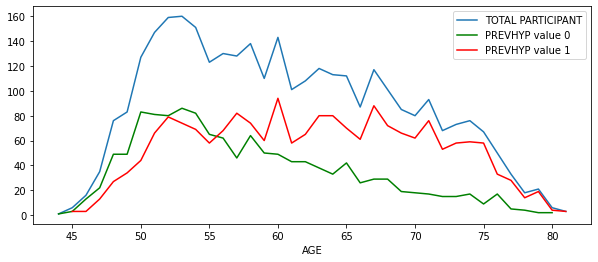

In [79]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1, color = 'g')
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1, color = 'r')

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()